In [2]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Train.csv')

In [4]:
data['investment_4'].describe()

count    15000.000000
mean      3523.049025
std       7373.355434
min     -12179.000000
25%          0.000000
50%       2351.000000
75%       6885.000000
max      35346.000000
Name: investment_4, dtype: float64

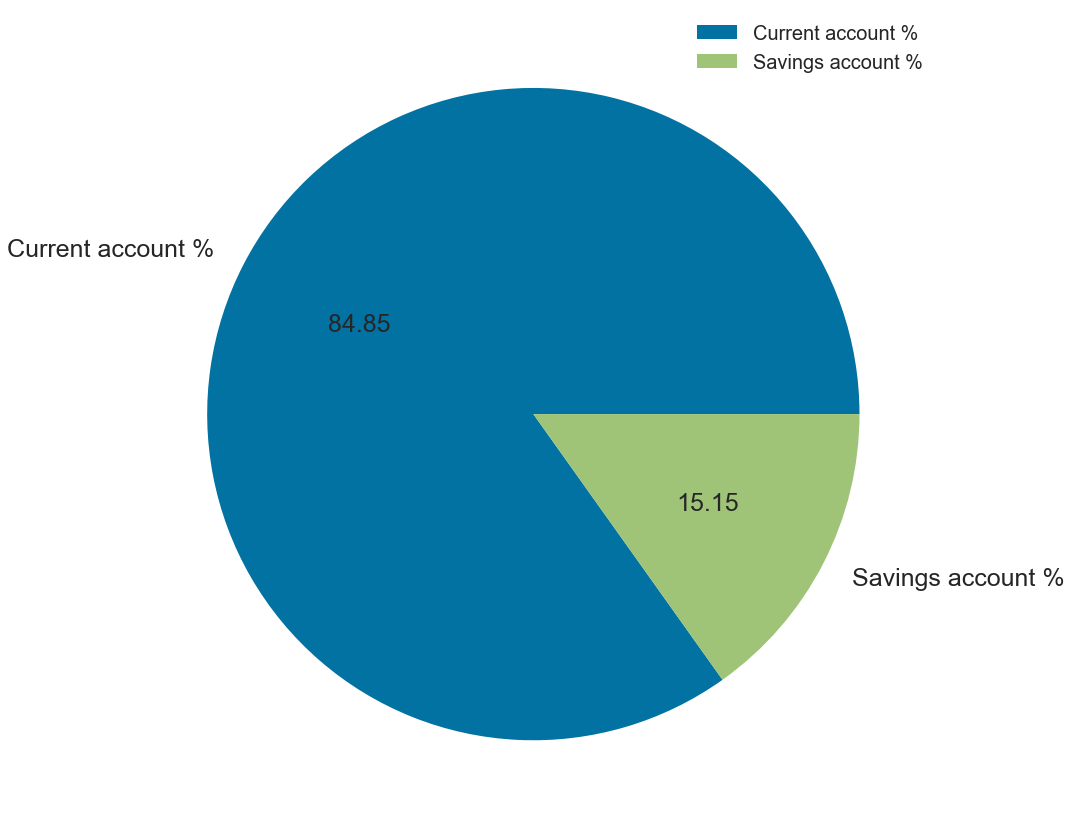

In [5]:
acc_type = data['account_type'].value_counts()
labels_acc = 'Current account %', 'Savings account %'
plt.figure(figsize=(20,15))
plt.pie(acc_type, labels = labels_acc, autopct='%1.2f', textprops={'fontsize': 25})
plt.legend(prop={'size': 20})

### The bank has more number of current accounts as compared to savings accounts

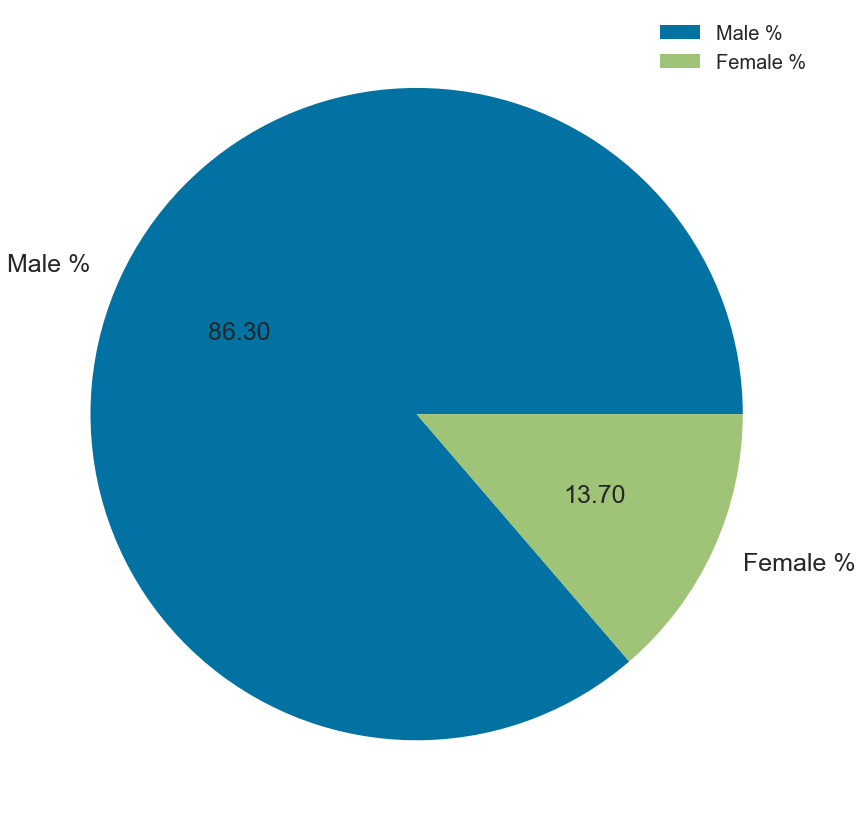

In [6]:
acc_type = data['gender'].value_counts()
labels_acc = 'Male %', 'Female %'
plt.figure(figsize=(20,15))
plt.pie(acc_type, labels = labels_acc, autopct='%1.2f', textprops={'fontsize': 25})
plt.legend(prop={'size': 20})

### The bank has more number of male customers

In [7]:
#credit and debit cart total amount consumption for the months of April, May and June
cols = ['cc_cons_apr','cc_cons_may','cc_cons_jun','dc_cons_apr','dc_cons_may','dc_cons_jun']

cols_df = data[cols].sum()
cc_monthwise = {'April': cols_df['cc_cons_apr'], 'May': cols_df['cc_cons_may'], 'June': cols_df['cc_cons_jun']}
dc_monthwise = {'April': cols_df['dc_cons_apr'], 'May': cols_df['dc_cons_may'], 'June': cols_df['dc_cons_jun']}

In [8]:
data['dc_cons_apr'].sum()

122566474.30000001

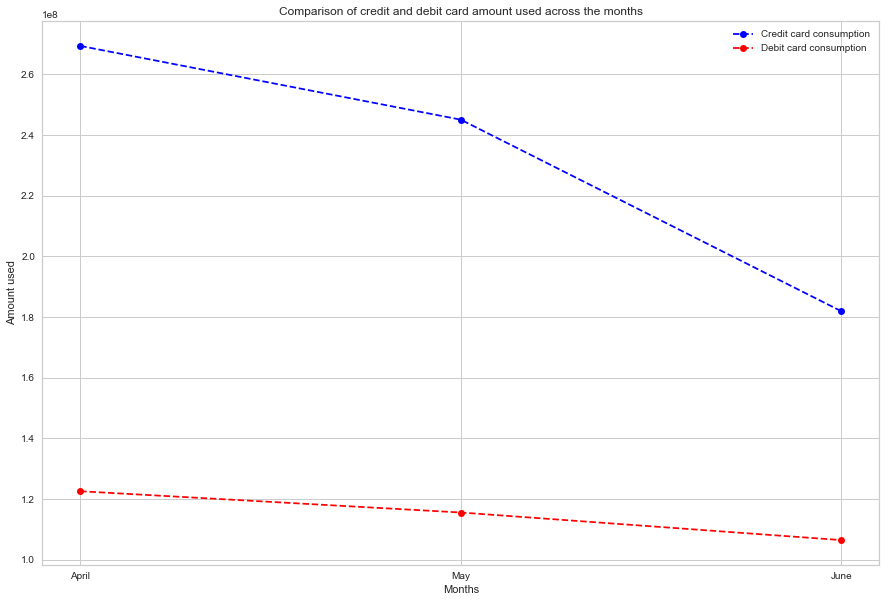

In [9]:
lists = cc_monthwise.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)

plt.plot(x, y, color='blue', marker='o', linestyle='--', label='Credit card consumption')

lists = dc_monthwise.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Debit card consumption')
plt.title("Comparison of credit and debit card amount used across the months")
plt.xlabel("Months")
plt.ylabel("Amount used")
plt.legend()
plt.show()

### Amount of credict card used is far greater than the amount of debit card. There is downward trend in both type of cards.

In [10]:
#credit and debit cart total transactions for the months of April, May and June
cols = ['cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr','dc_count_may','dc_count_jun']

cols_df = data[cols].sum()
cc_monthwise_count = {'April': cols_df['cc_count_apr'], 'May': cols_df['cc_count_may'], 'June': cols_df['cc_count_jun']}
dc_monthwise_count = {'April': cols_df['dc_count_apr'], 'May': cols_df['dc_count_may'], 'June': cols_df['dc_count_jun']}

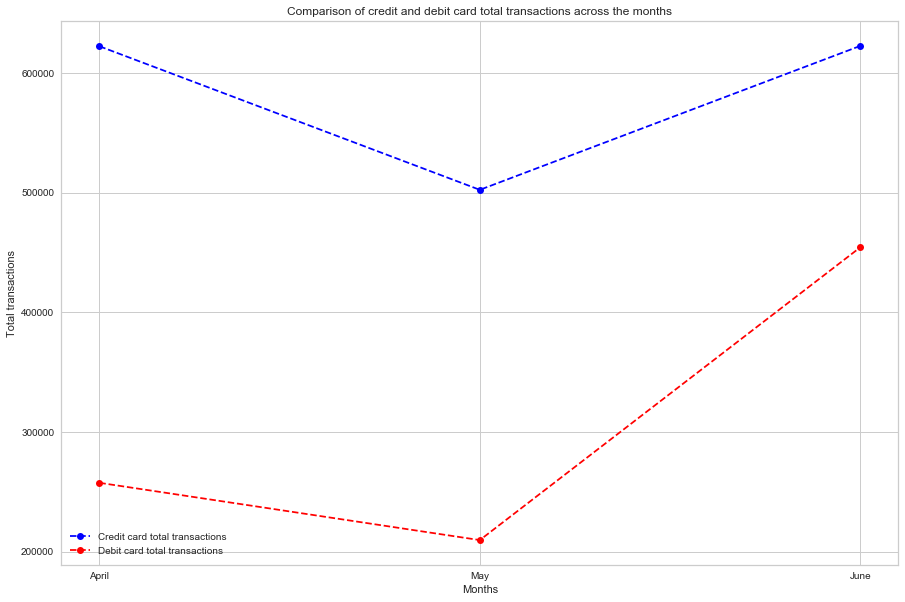

In [11]:
lists = cc_monthwise_count.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)

plt.plot(x, y, color='blue', marker='o', linestyle='--', label='Credit card total transactions')

lists = dc_monthwise_count.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Debit card total transactions')
plt.title("Comparison of credit and debit card total transactions across the months")
plt.xlabel("Months")
plt.ylabel("Total transactions")
plt.legend()
plt.show()

### Both credit and debit card transactions increased in the month of June. We observed earlier that the total amount used has decreased for both card types. Amount decreased and transactions increased...can we infer that more transactions with smaller amount occured in the month of  June?

### We have not considered analysing using the ratio of amount spent and number of transactions because consider the scenario where a customer makes a transaction of 10,000 rupees and the next 2 transactions are only of 1000 rupees. So the average transaction amount comes out to be 4000 rupees which can be misleading

In [12]:
#total number of times amount were debited/credited in account for the months of April, May and June
cols = ['debit_count_apr','debit_count_may','debit_count_jun','credit_count_apr','credit_count_may','credit_count_jun']

cols_df = data[cols].sum()
monthwise_debit = {'April': cols_df['debit_count_apr'], 'May': cols_df['debit_count_may'], 'June': cols_df['debit_count_jun']}
monthwise_credit = {'April': cols_df['credit_count_apr'], 'May': cols_df['credit_count_may'], 'June': cols_df['credit_count_jun']}

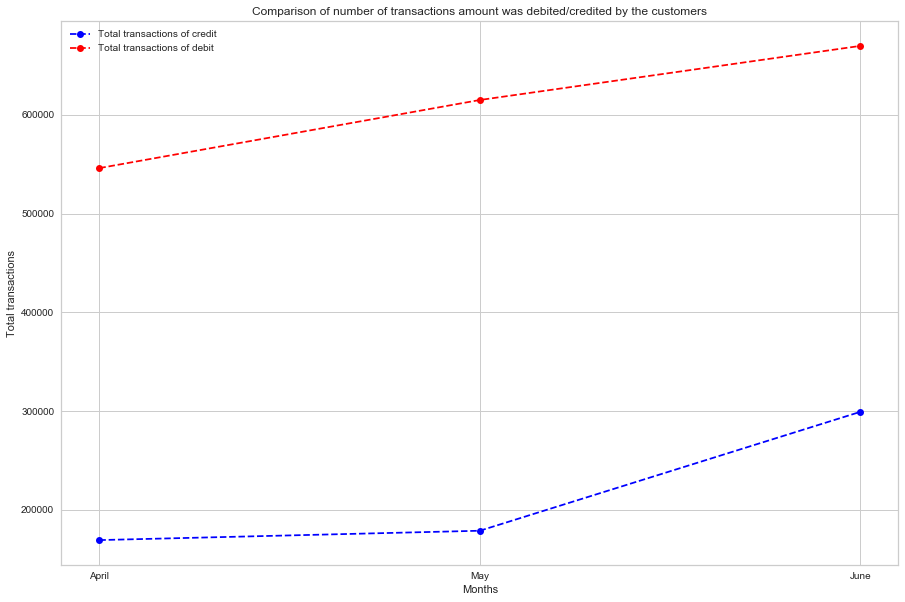

In [13]:
lists = monthwise_credit.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)

plt.plot(x, y, color='blue', marker='o', linestyle='--', label='Total transactions of credit')

lists = monthwise_debit.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Total transactions of debit')
plt.title("Comparison of number of transactions amount was debited/credited by the customers")
plt.xlabel("Months")
plt.ylabel("Total transactions")
plt.legend()
plt.show()

In [14]:
#total amount debited/credited in account for the months of April, May and June
cols = ['credit_amount_apr','credit_amount_may','credit_amount_jun','debit_amount_apr','debit_amount_may','debit_amount_jun']

cols_df = data[cols].sum()
monthwise_debit_amt = {'April': cols_df['debit_amount_apr'], 'May': cols_df['debit_amount_may'], 'June': cols_df['debit_amount_jun']}
monthwise_credit_amt = {'April': cols_df['credit_amount_apr'], 'May': cols_df['credit_amount_may'], 'June': cols_df['credit_amount_jun']}

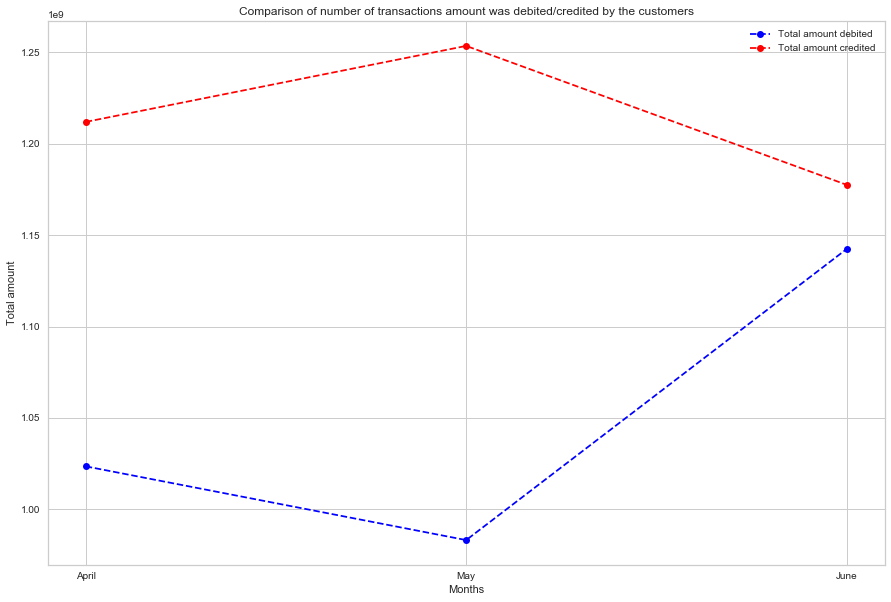

In [31]:
lists = monthwise_debit_amt.items() 
plt.figure(figsize=(15,10))
x, y = zip(*lists)

plt.plot(x, y, color='blue', marker='o', linestyle='--', label='Total amount debited')

lists = monthwise_credit_amt.items() 
x, y = zip(*lists)
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Total amount credited')
plt.title("Comparison of number of transactions amount was debited/credited by the customers")
plt.xlabel("Months")
plt.ylabel("Total amount")
plt.legend()
plt.show()

### We can observe that the amount being debited has increased in the month of June and also the amount being credited has decreased. This is a negative sign as the amount going out is more than the amount coming in. Bank should keep a track on this for the coming months

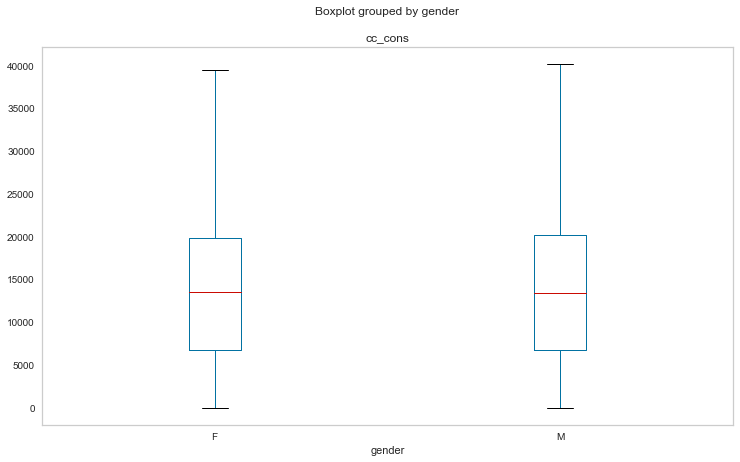

In [32]:
data.boxplot(by ='gender', column =['cc_cons'], grid = False,showfliers=False, figsize=(12,7))

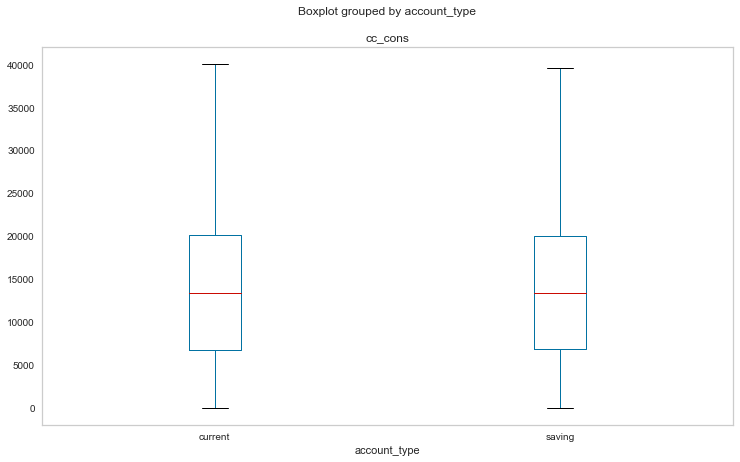

In [33]:
data.boxplot(by ='account_type', column =['cc_cons'], grid = False, showfliers=False, figsize=(12,7))

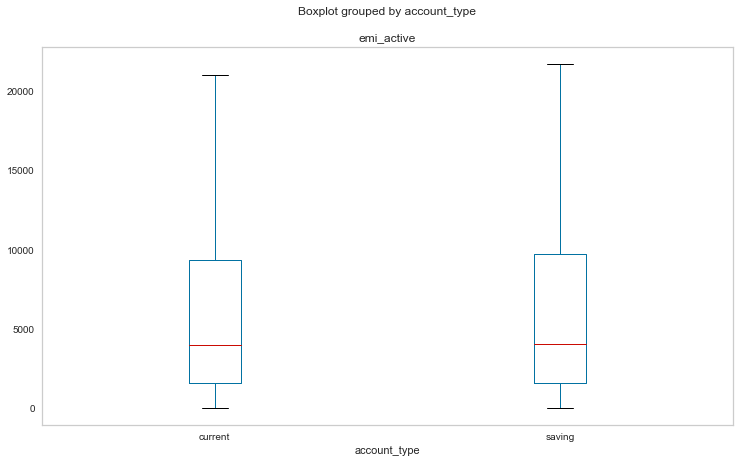

In [34]:
data.boxplot(by ='account_type', column =['emi_active'], grid = False, showfliers=False, figsize=(12,7))

### There is no effect of account type and the montly emi paid to other banks per month

In [35]:
#taking average of credit card consumption of previous 3 months
data['previous_cc'] = (data['cc_cons_apr'] + data['cc_cons_may'] + data['cc_cons_jun'])/3

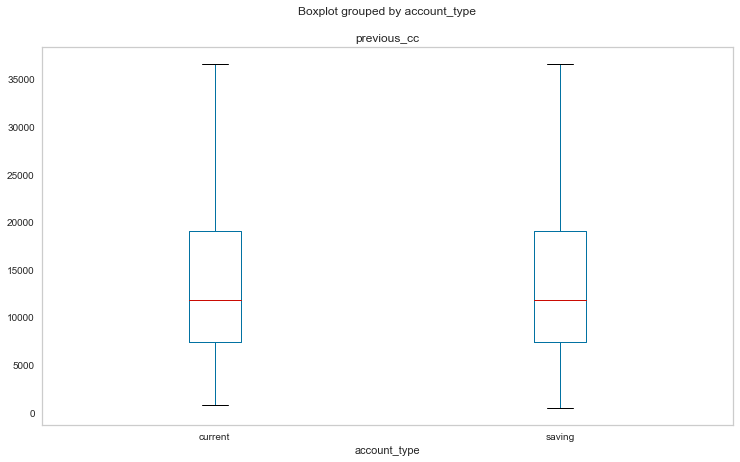

In [36]:
data.boxplot(by ='account_type', column =['previous_cc'], grid = False, showfliers=False, figsize=(12,7))

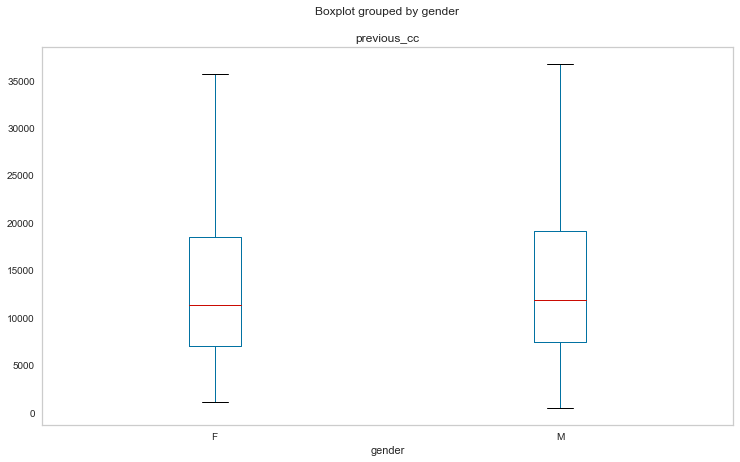

In [37]:
data.boxplot(by ='gender', column =['previous_cc'], grid = False, showfliers=False, figsize=(12,7))

### The average consumption of credit card and debit card is not affected by account type and gender

In [38]:
data['previous_dc'] = (data['dc_cons_apr'] + data['dc_cons_may'] + data['dc_cons_jun'])/3

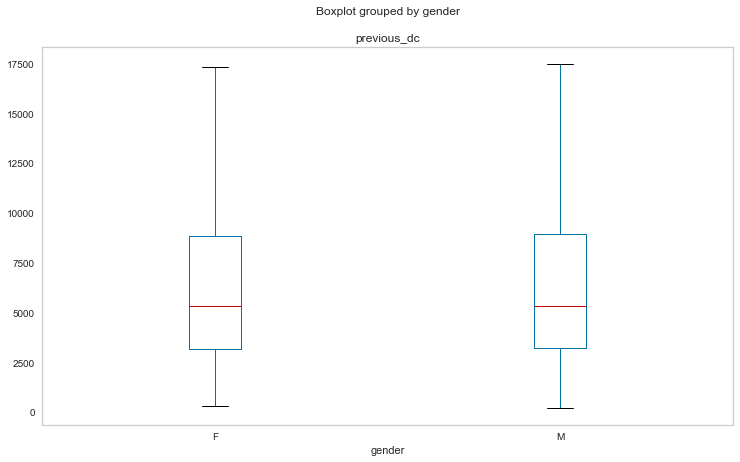

In [39]:
data.boxplot(by ='gender', column =['previous_dc'], grid = False, showfliers=False, figsize=(12,7))

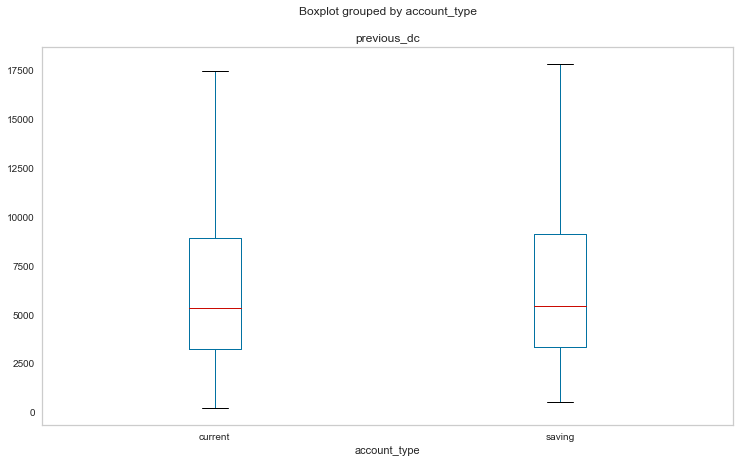

In [40]:
data.boxplot(by ='account_type', column =['previous_dc'], grid = False, showfliers=False, figsize=(12,7))

In [41]:
#function for dropping columns
def drop_col(df,col_list):
    for col in col_list:
        if col in df.columns:
            df.drop(col, axis = 1, inplace=True)
    return df

In [42]:
not_req = ['ID','region_code','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']

In [43]:
#removing unwanted columns 
data = drop_col(data, not_req)

In [44]:
#encoding categorical data using one hot encoding
data = pd.get_dummies(data=data, columns=['account_type', 'gender'])
data.head(5)

age  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  \
0   35     24893.00       378.00     10288.00     29664.00     16291.40   
1   35     18941.62       966.00     20672.00       287.00      4217.00   
2   55      5678.87      2724.00      1964.50      3933.11     23956.25   
3   29     30489.50      1236.00     12609.88      9138.14     17521.00   
4   34      7441.40      6906.04      4364.00      1939.00      2121.00   

   dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  ...  \
0     11432.00           2.0          26.0          10.0  ...   
1       885.00           1.0           7.0          13.0  ...   
2      5168.00          43.0          32.0         102.0  ...   
3     13650.30          53.0           1.0          50.0  ...   
4      6829.18          67.0          47.0          82.0  ...   

   debit_count_jun  max_credit_amount_jun  emi_active  cc_cons   previous_cc  \
0             65.0                50836.0     1674.09  20014.0  17157.466667   
1             63.0                23226.0    13043.34  10173.0  14610.206667   
2              1.0                27036.0    25375.27  16095.0  10533.206667   
3             83.0                43037.0     3544.33   7707.0  20206.793333   
4             32.0                32044.0    12780.44  96408.0   4642.133333   

    previous_dc  account_type_current  account_type_saving  gender_F  gender_M  
0  13824.666667                     1                    0         0         1  
1    712.666667                     1                    0         0         1  
2   3941.703333                     1                    0         0         1  
3   8008.146667                     1                    0         1         0  
4   5224.740000                     1                    0         0         1  

[5 rows x 41 columns]

In [45]:
cat_cols = ['account_type_current','account_type_saving','gender_F','gender_M']

In [46]:
numerical_data = data.drop(cat_cols, axis=1)
numerical_data.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons', 'previous_cc',
       'previous_dc'],
      dtype='object')

In [47]:
def plot_scatter(dataframe, target_col):
    plt.figure()
    for col in dataframe.columns:
        if col != target_col:
            plt.figure(figsize=(12,7))
            plt.scatter(x=dataframe[col], y=dataframe[target_col])
            plt.xlabel(col)
            plt.ylabel(target_col)

<Figure size 432x288 with 0 Axes>

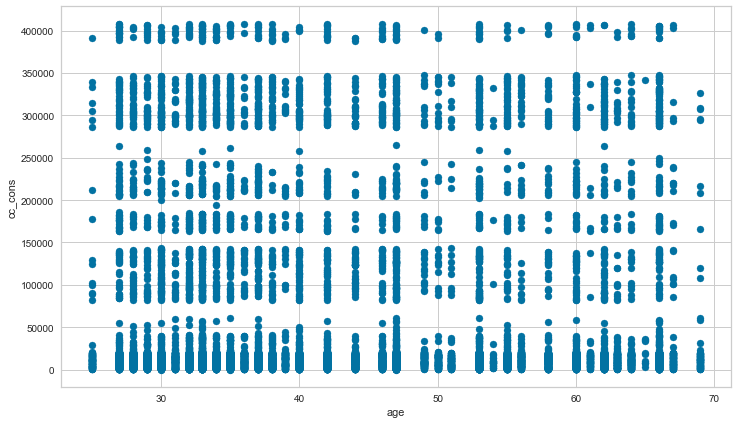

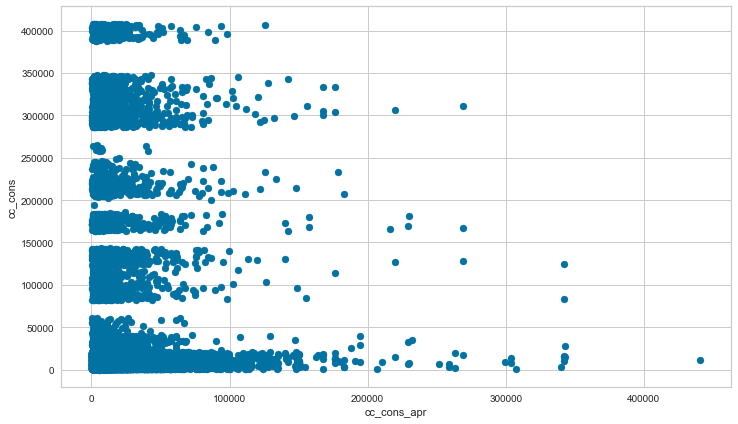

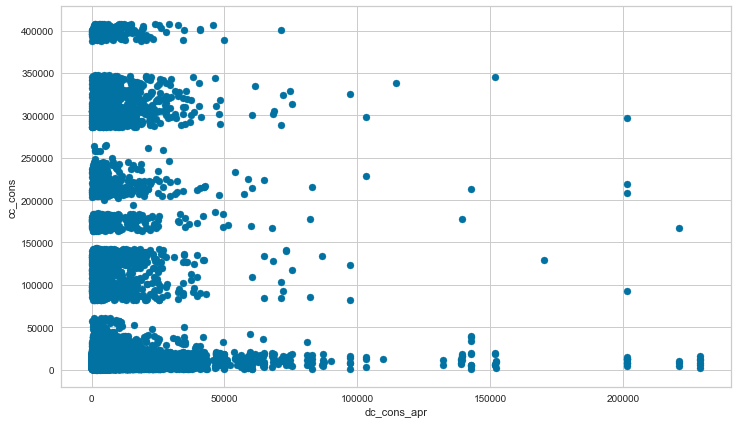

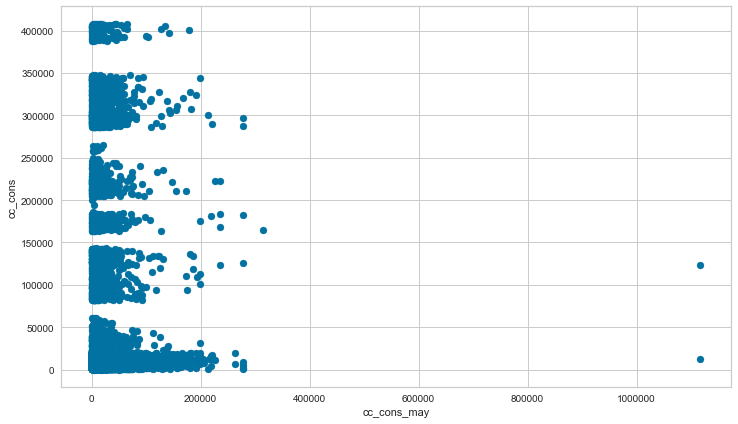

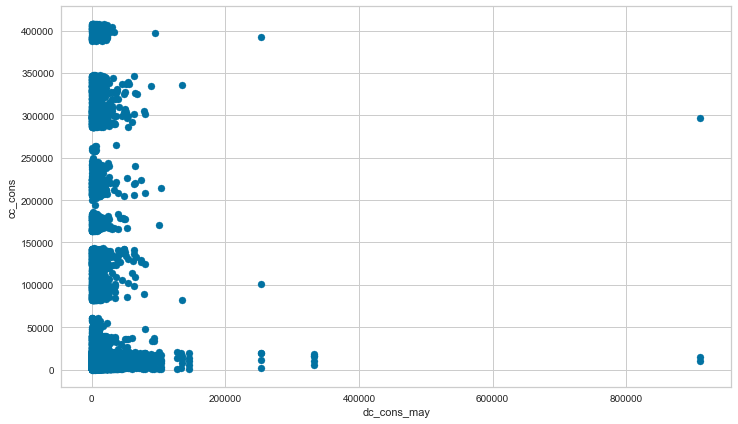

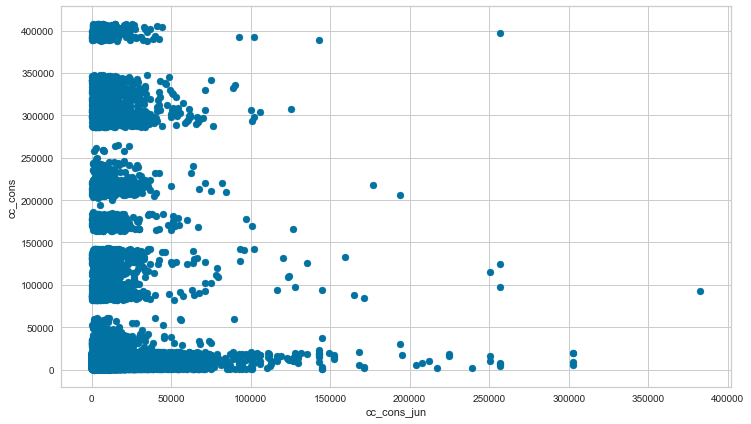

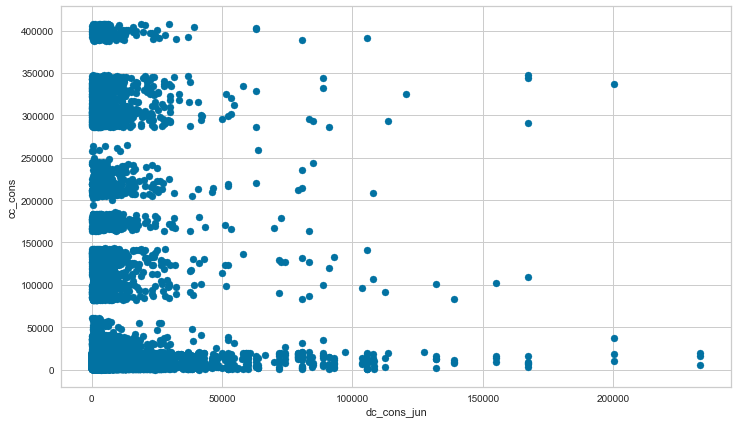

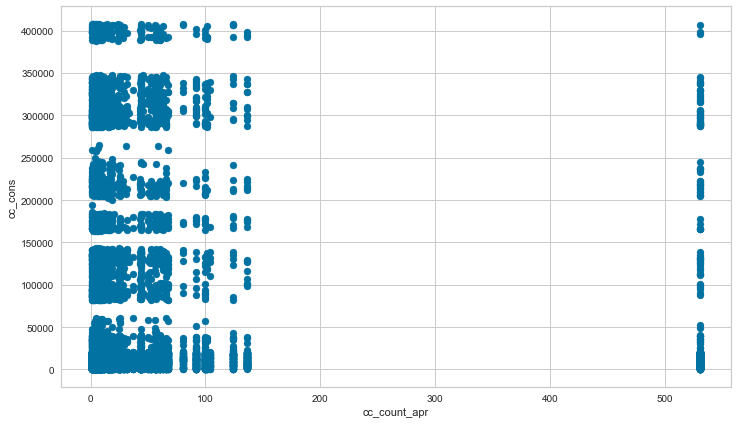

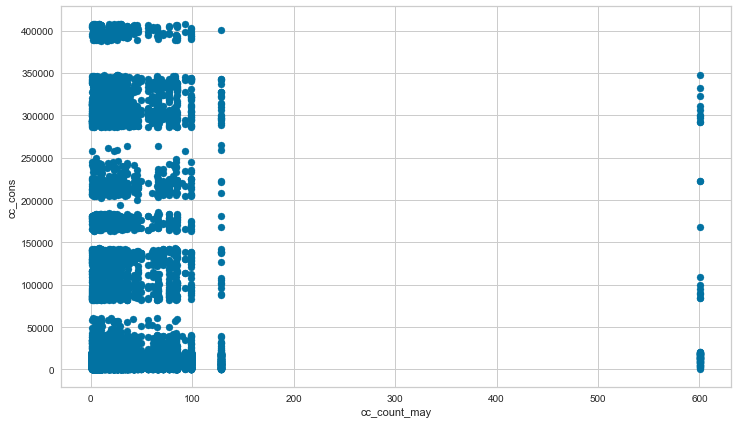

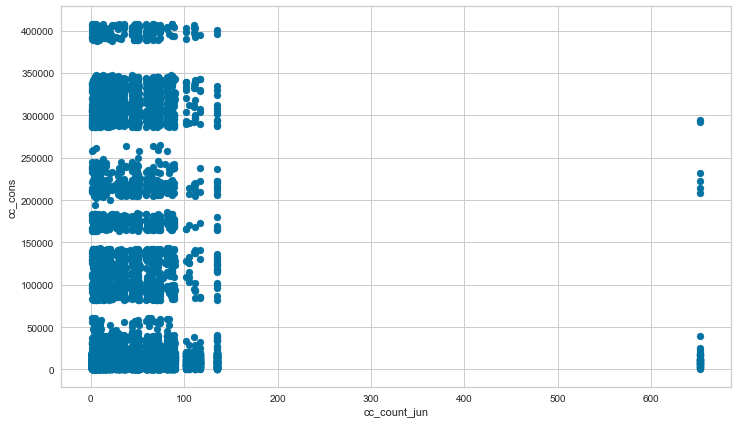

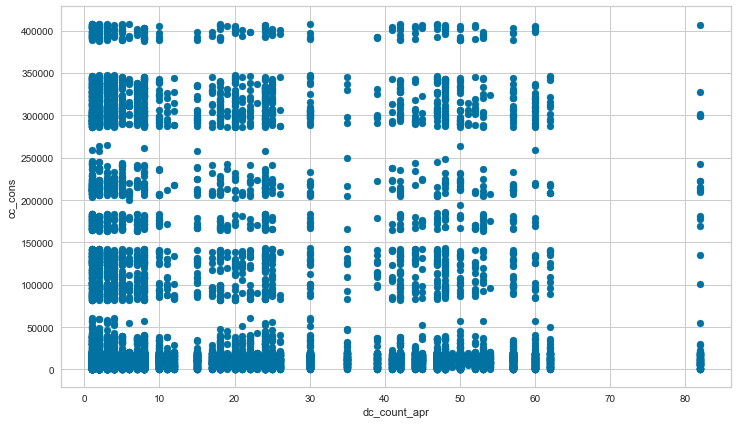

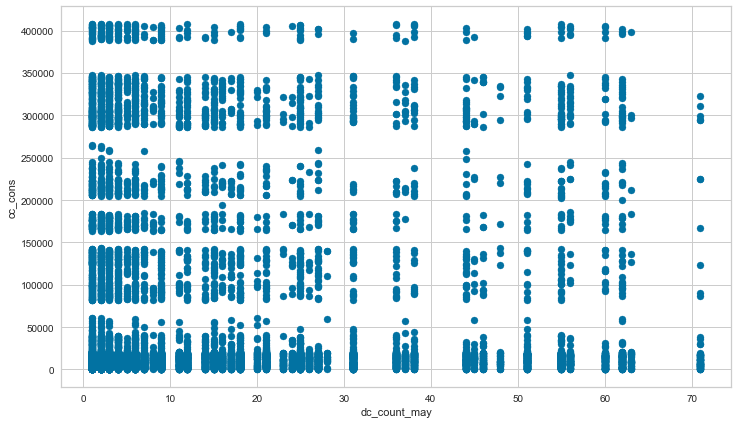

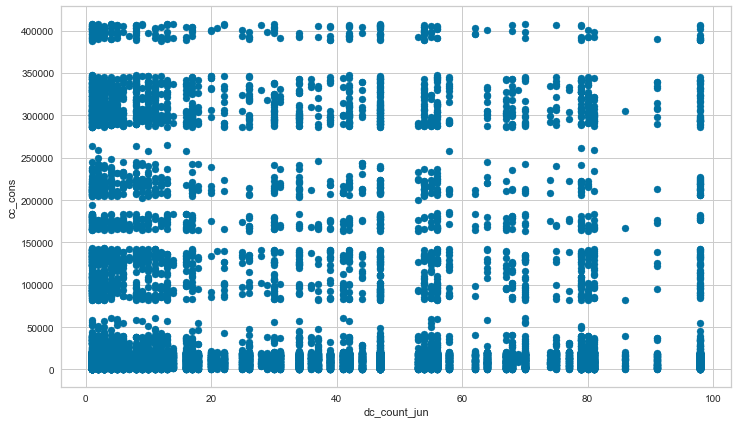

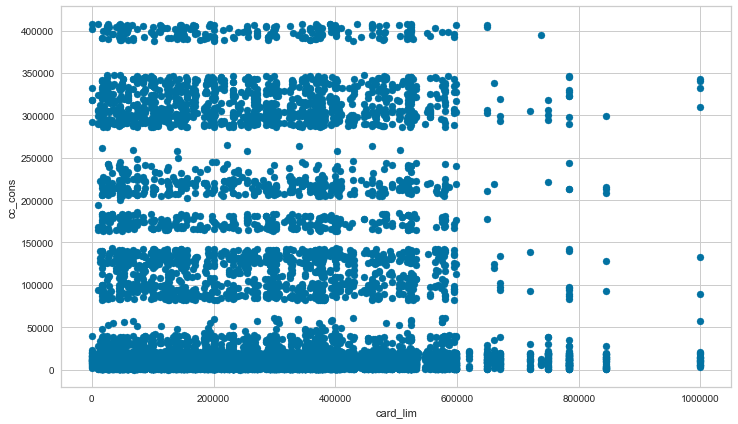

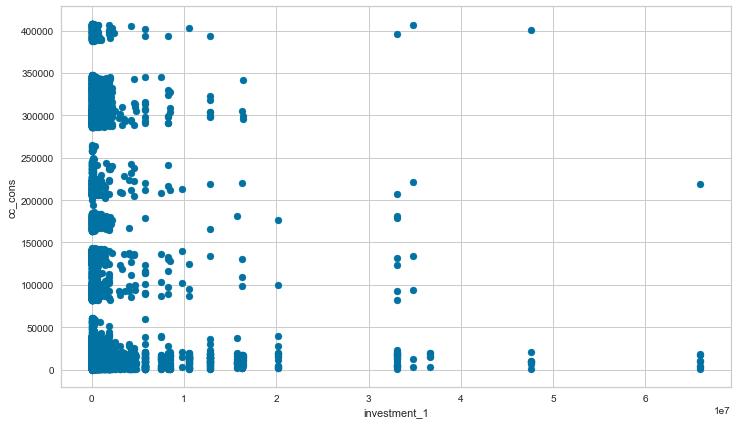

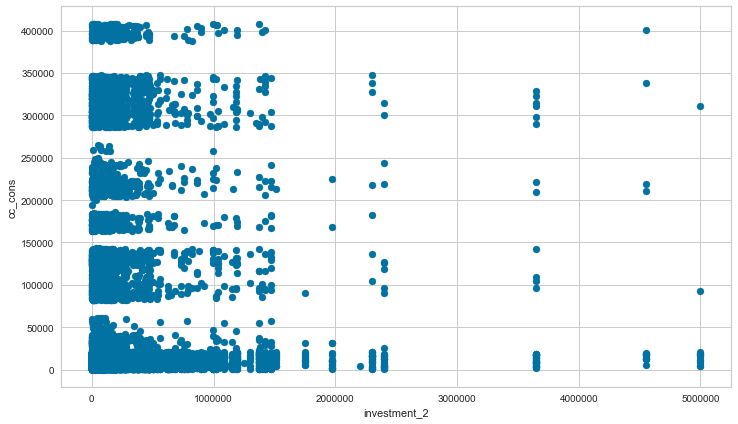

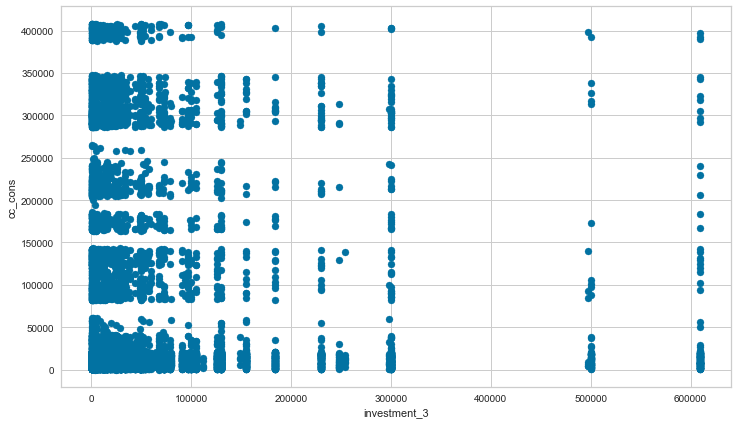

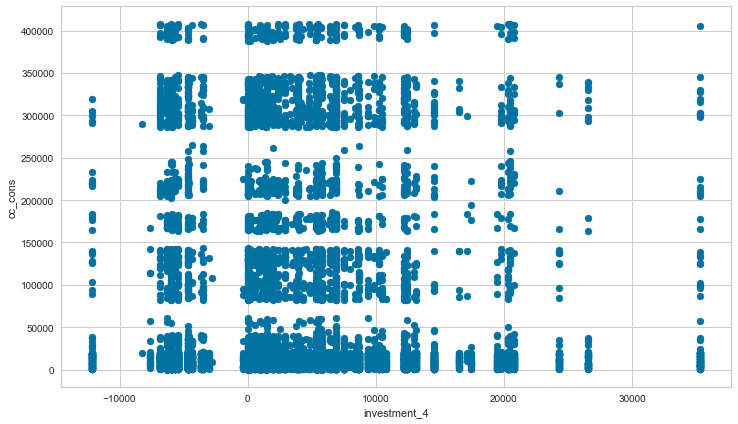

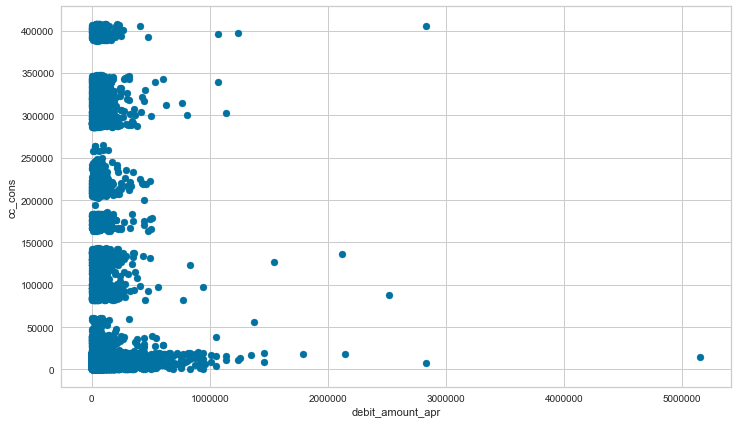

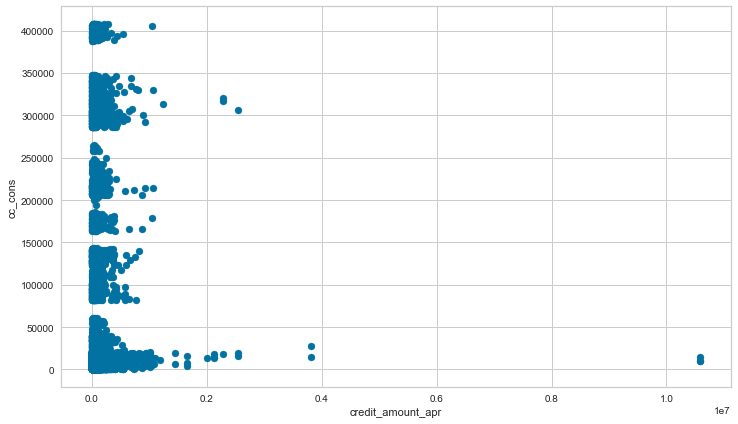

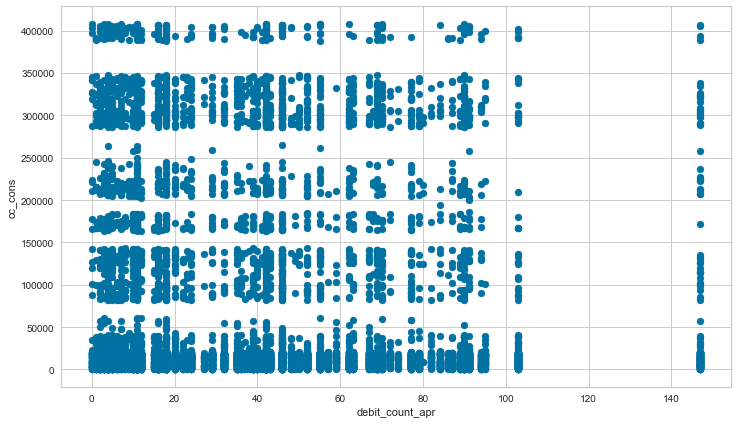

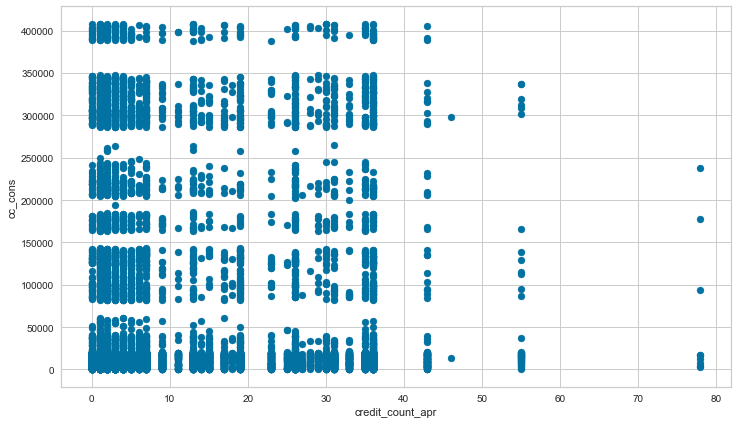

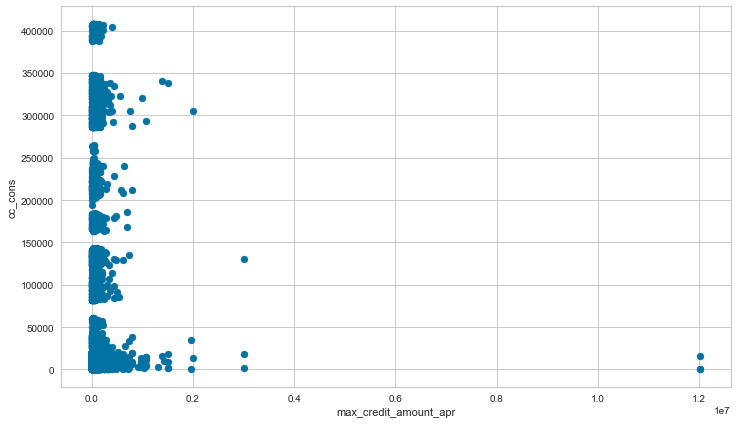

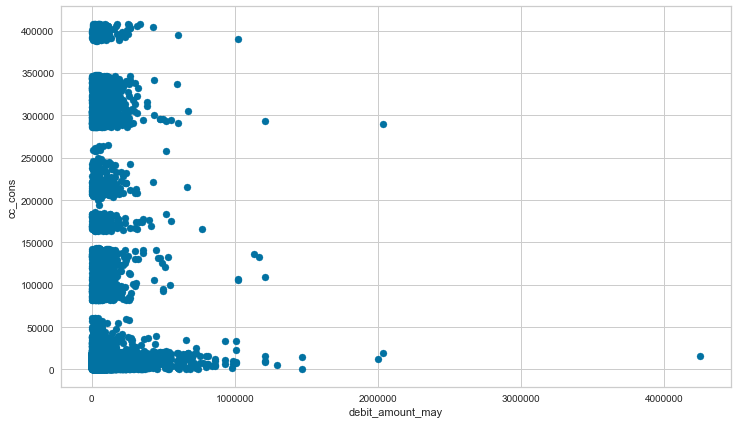

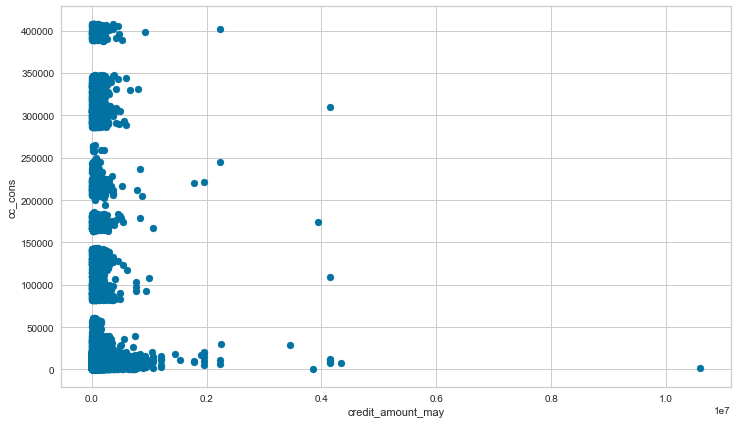

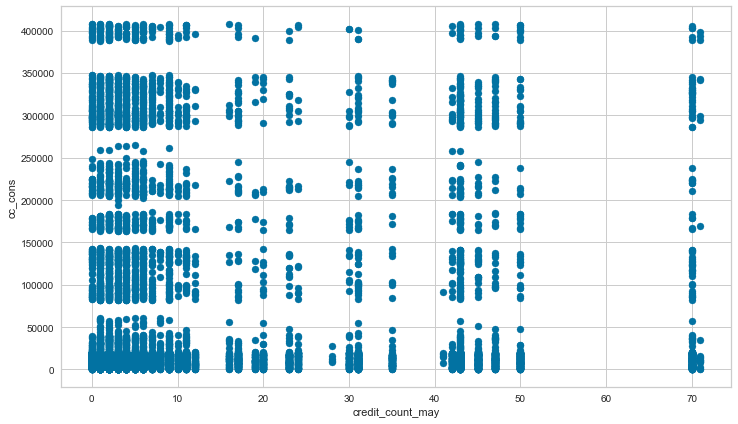

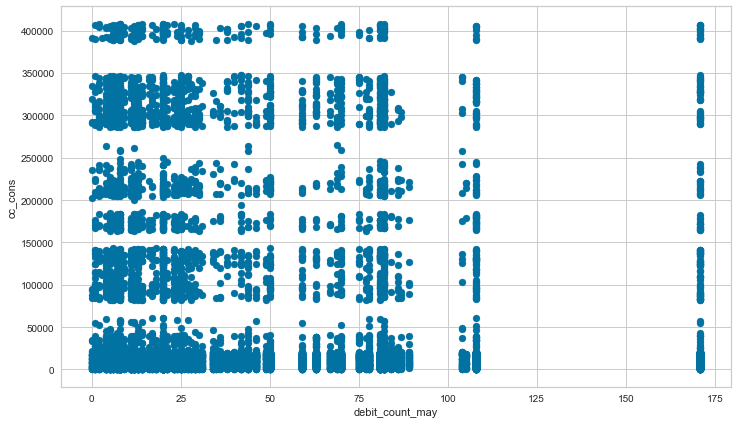

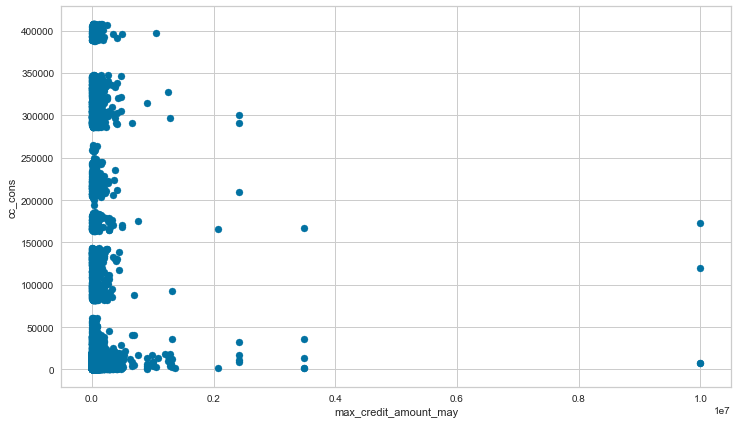

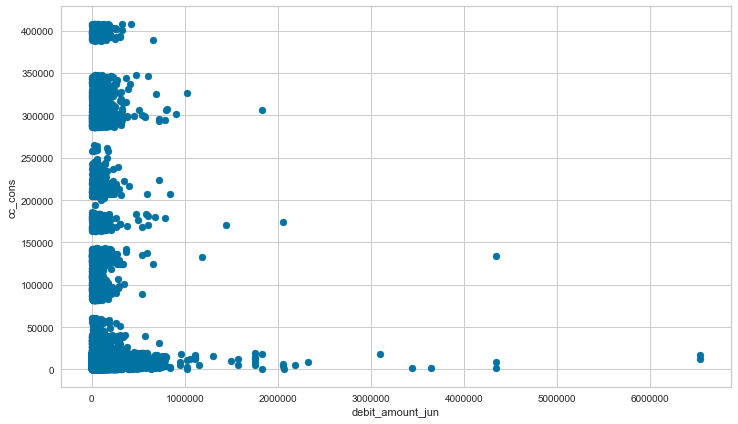

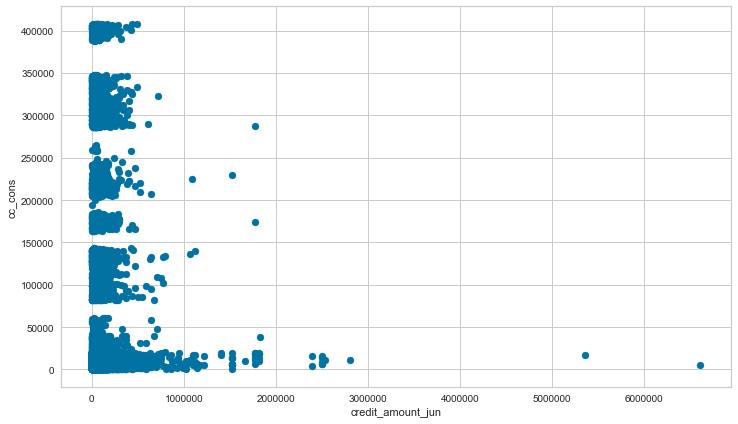

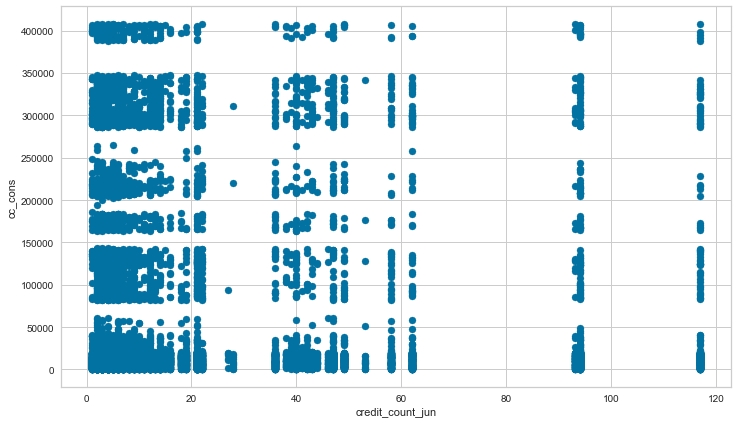

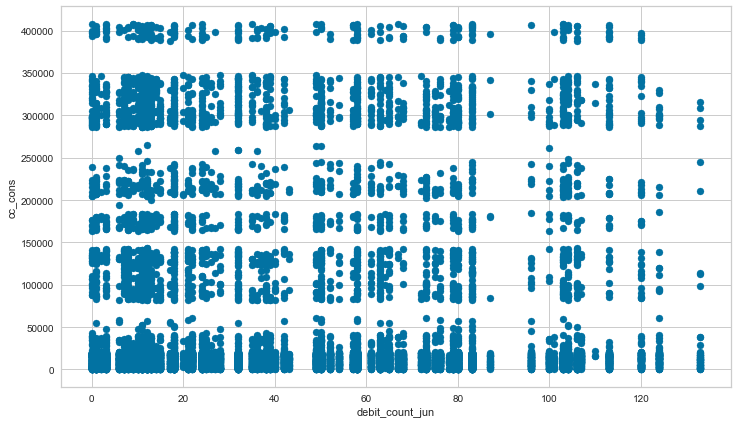

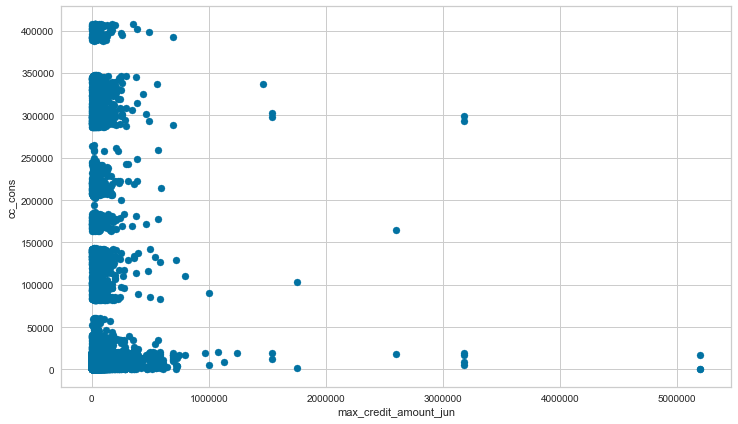

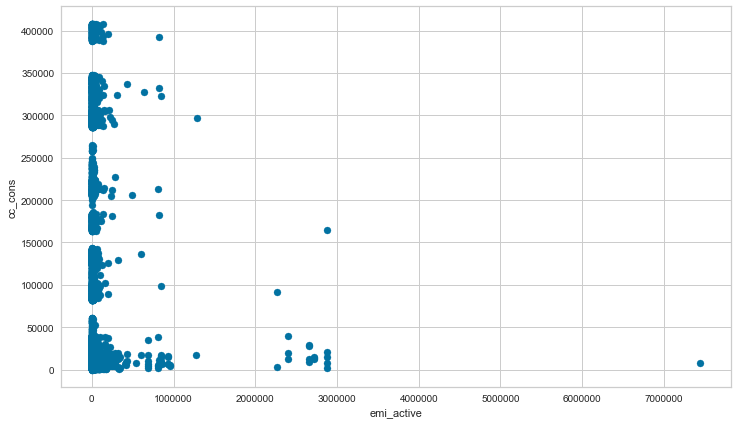

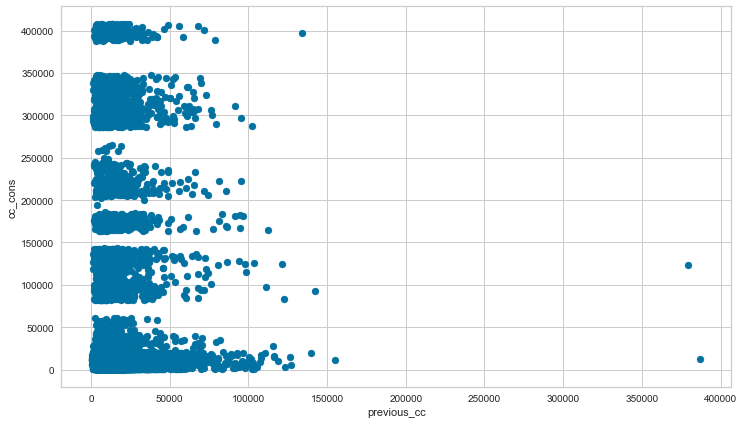

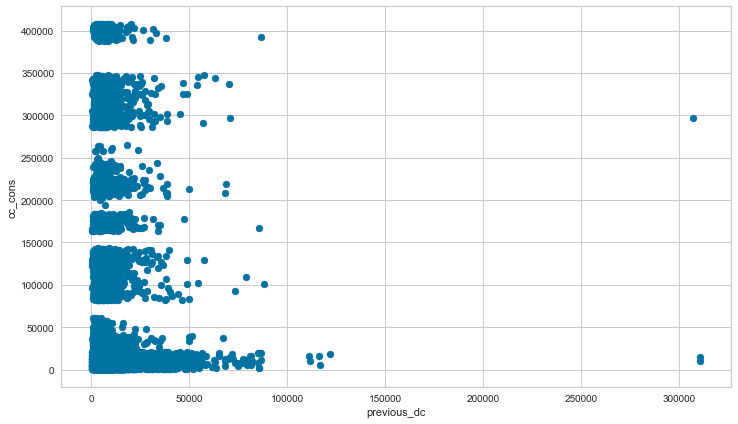

In [48]:
plot_scatter(numerical_data, 'cc_cons')

### Scatter plots have not given any type of relationship visualisation

In [49]:
#outlier analysis
def plot_boxplots(dataframe):
    for col in dataframe.columns:
        plt.figure()
        dataframe.boxplot([col])

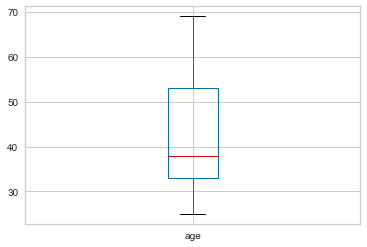

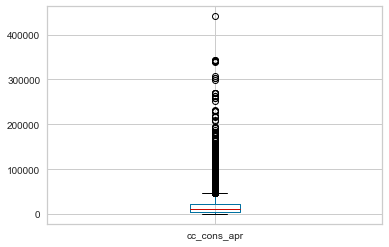

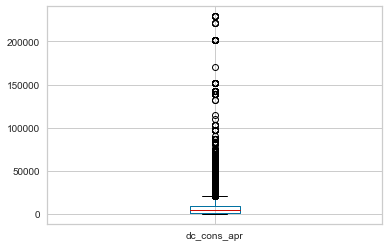

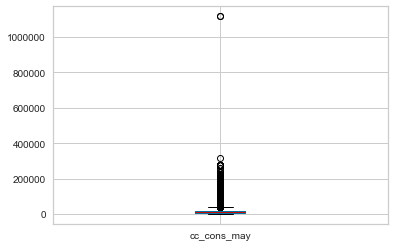

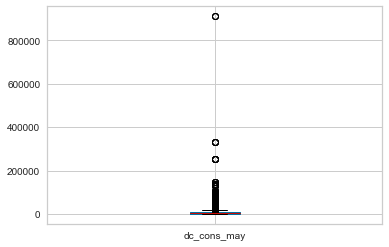

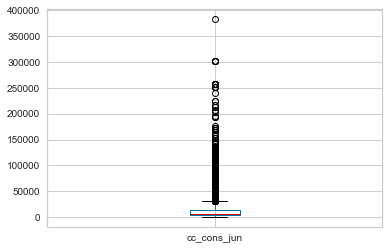

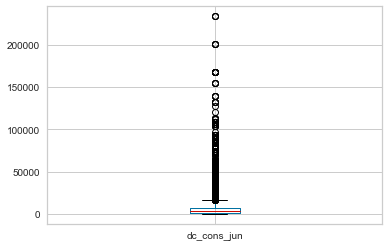

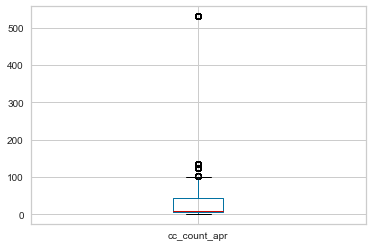

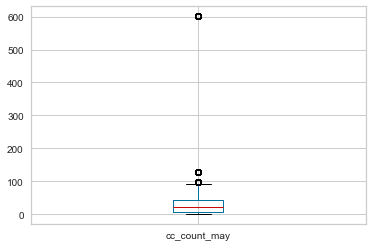

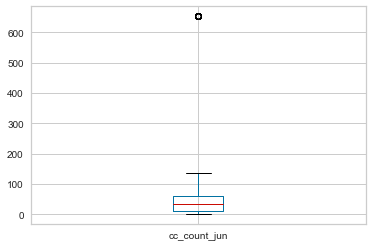

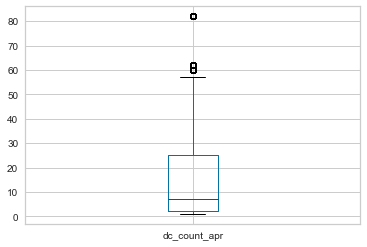

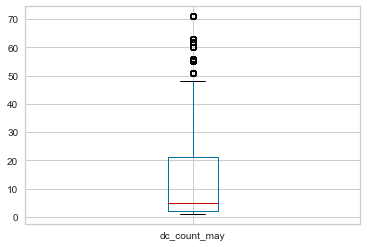

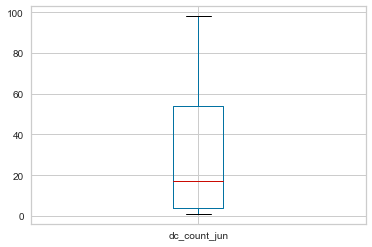

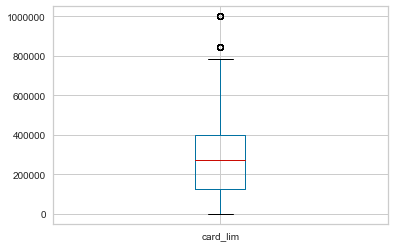

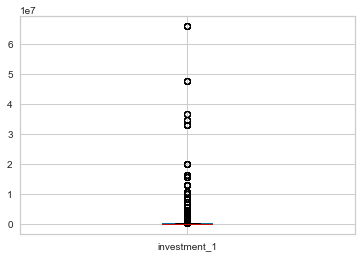

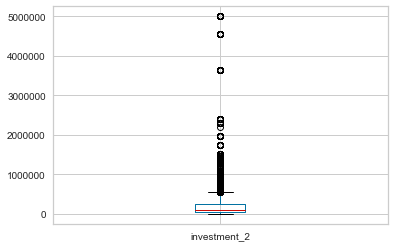

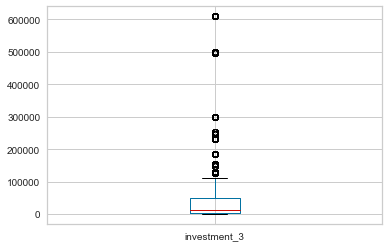

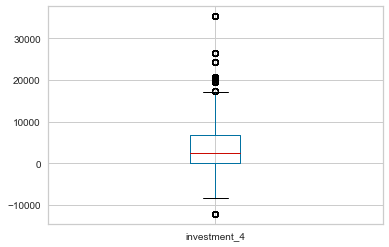

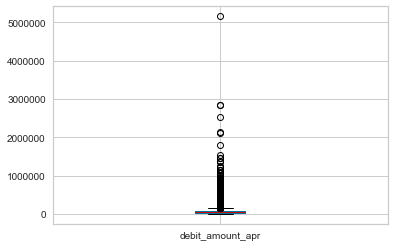

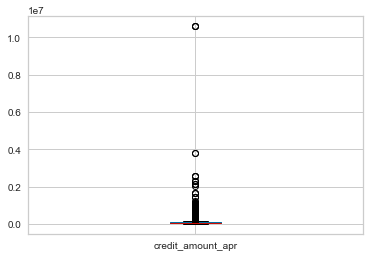

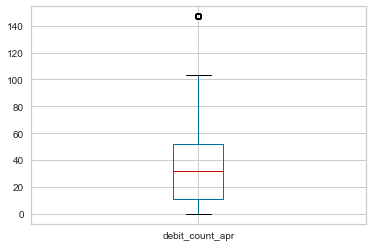

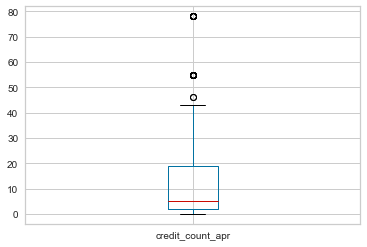

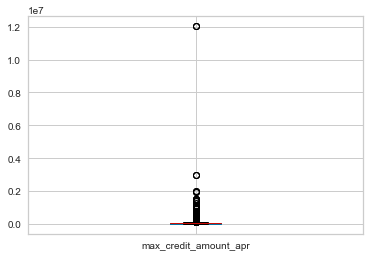

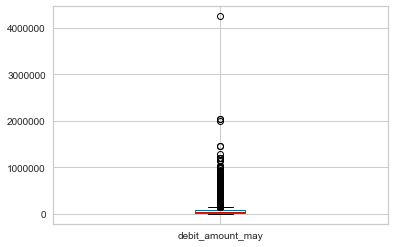

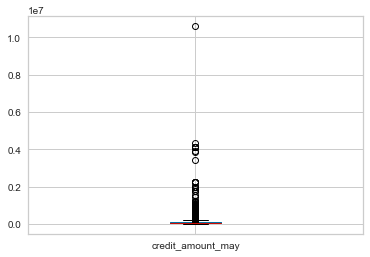

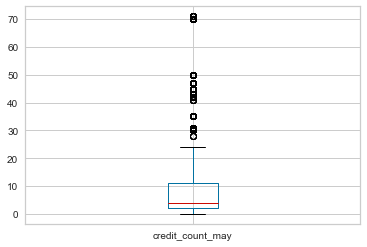

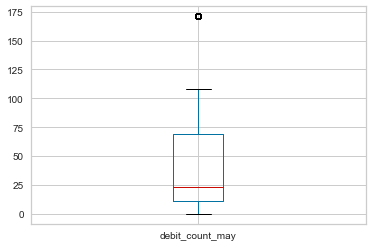

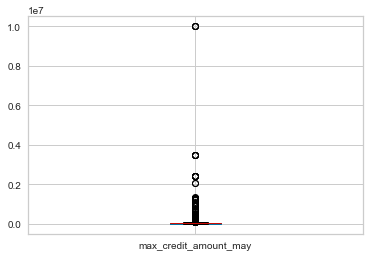

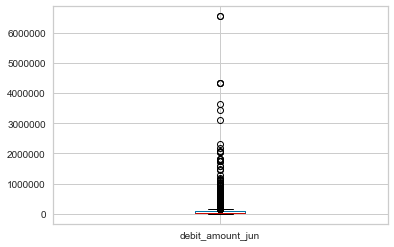

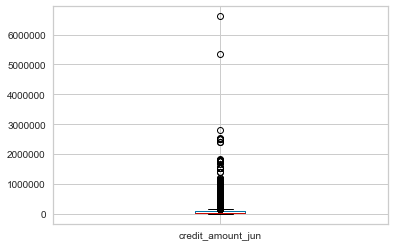

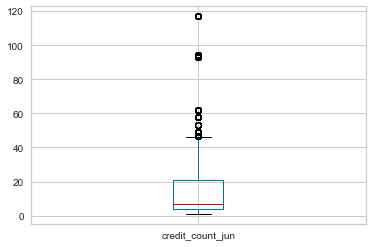

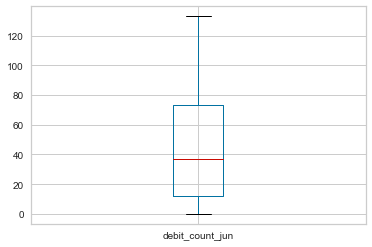

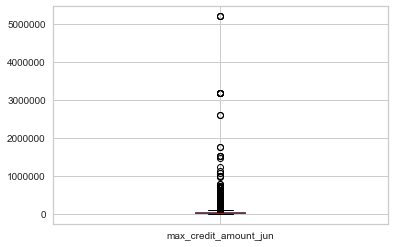

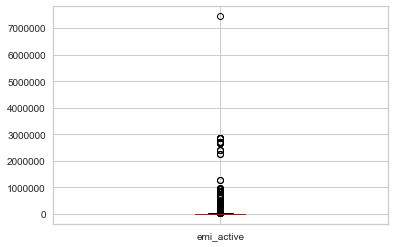

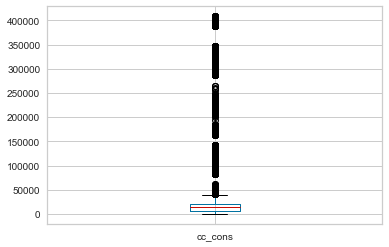

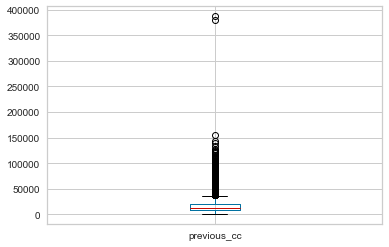

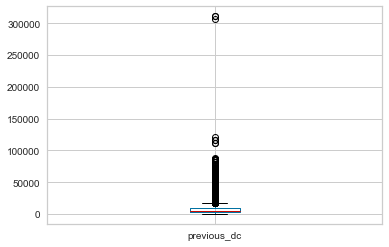

In [50]:
plot_boxplots(numerical_data)

### For almost every column, there are a very high number of outliers. We need to identify and treat them

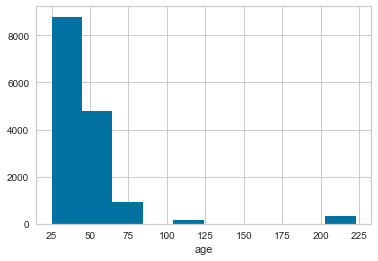

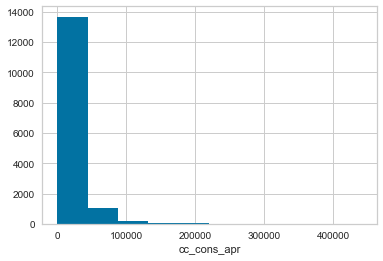

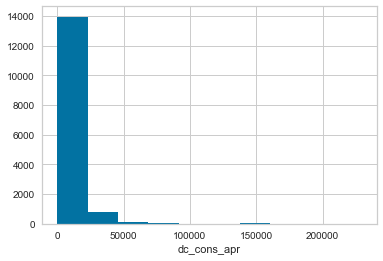

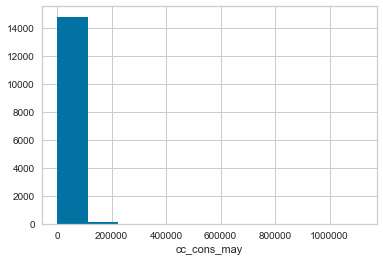

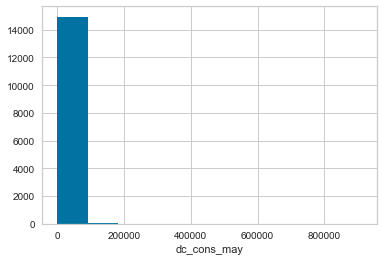

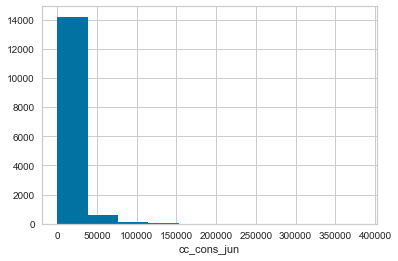

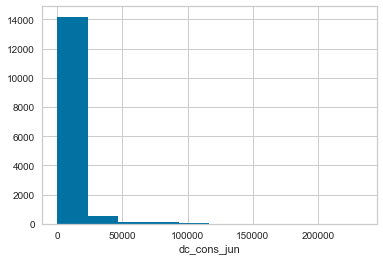

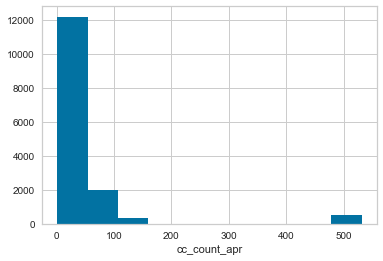

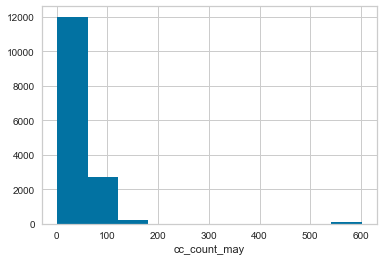

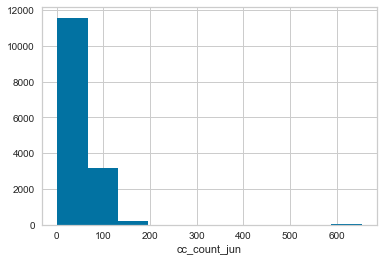

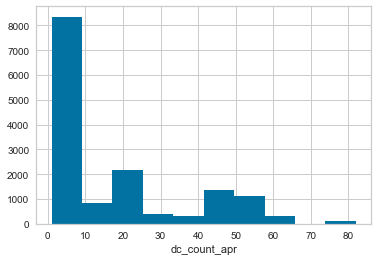

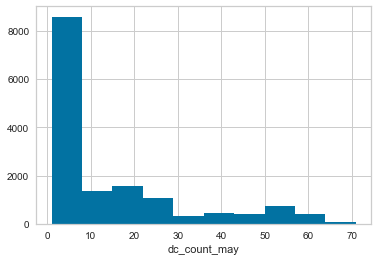

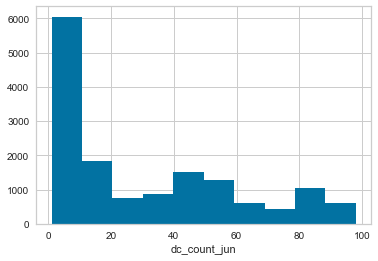

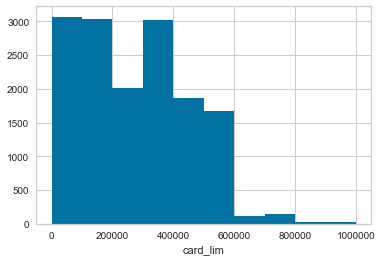

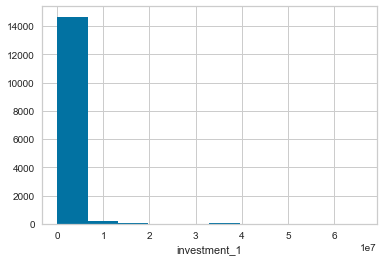

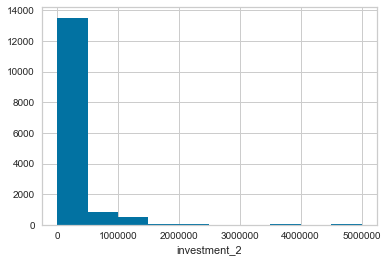

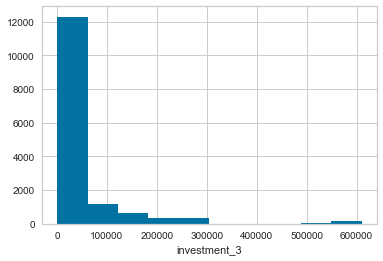

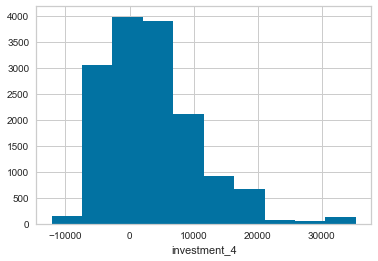

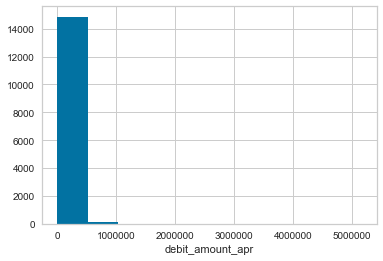

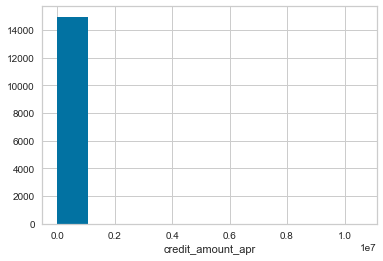

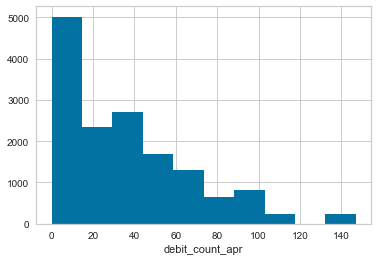

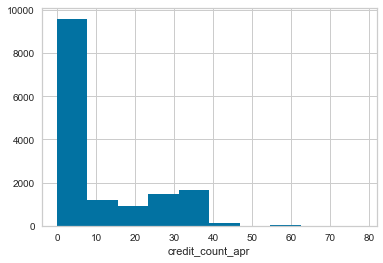

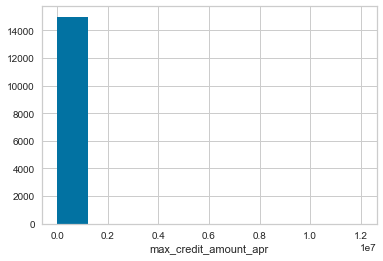

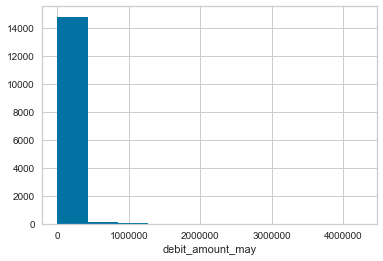

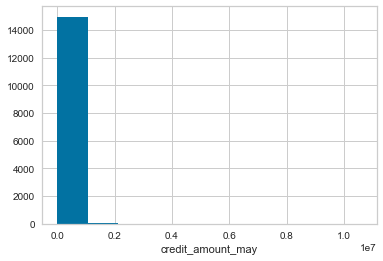

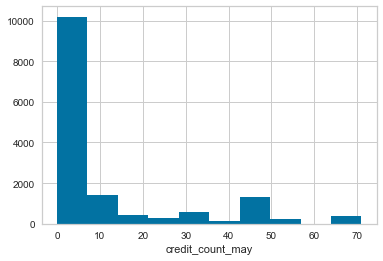

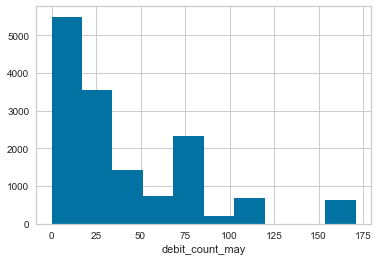

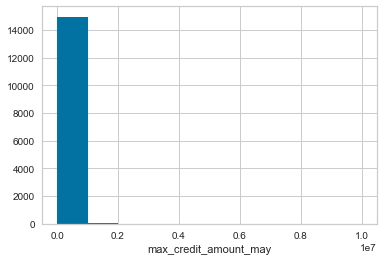

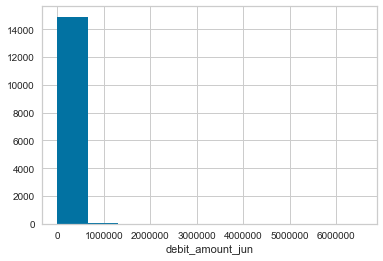

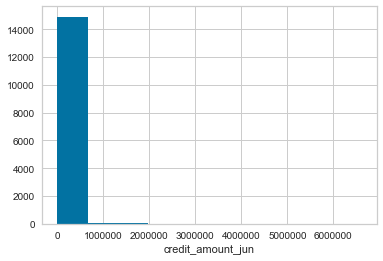

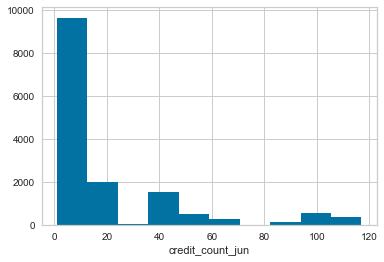

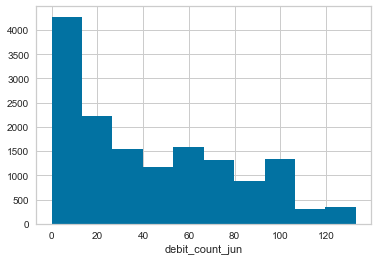

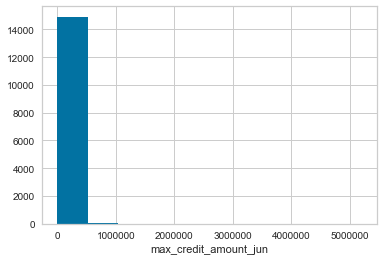

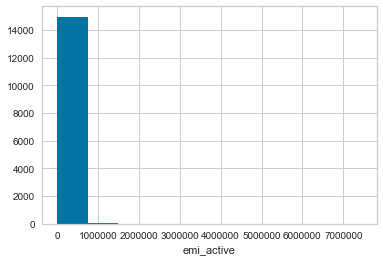

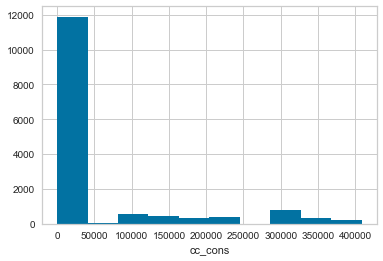

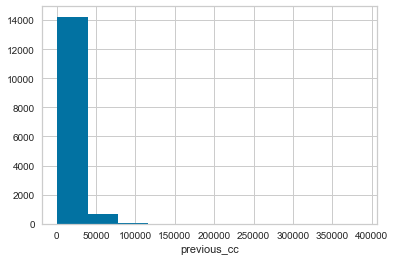

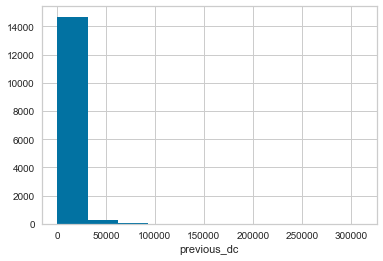

In [67]:
for col in numerical_data.columns:
    plt.figure()
    plt.hist(numerical_data[col])
    plt.xlabel(col)

### Every column is skewed in the right direction, one reason for this is due to the high number of outliers we observed earlier in the boxplots.

In [51]:
#checking the number of rows for each variable that fall outside 3*IQR range
def get_outliers_count(dataframe):
    count = {}
    for col in dataframe.columns:
        sorted_col = sorted(dataframe[col])
        Q1,Q3 = np.percentile(sorted_col , [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 - (3 * IQR)
        upper_range = Q3 + (3 * IQR)    
        outliers_df = dataframe[(dataframe[col] > upper_range) | (dataframe[col] < lower_range)]
        count[col] = outliers_df[col].count()
    return count

In [52]:
numerical_data['cc_cons_apr'].max()

441031.33

In [53]:
get_outliers_count(numerical_data)

{'age': 0,
 'cc_cons_apr': 462,
 'dc_cons_apr': 592,
 'cc_cons_may': 539,
 'dc_cons_may': 595,
 'cc_cons_jun': 533,
 'dc_cons_jun': 638,
 'cc_count_apr': 501,
 'cc_count_may': 71,
 'cc_count_jun': 46,
 'dc_count_apr': 0,
 'dc_count_may': 0,
 'dc_count_jun': 0,
 'card_lim': 0,
 'investment_1': 1763,
 'investment_2': 788,
 'investment_3': 707,
 'investment_4': 119,
 'debit_amount_apr': 565,
 'credit_amount_apr': 594,
 'debit_count_apr': 0,
 'credit_count_apr': 9,
 'max_credit_amount_apr': 697,
 'debit_amount_may': 573,
 'credit_amount_may': 448,
 'credit_count_may': 1985,
 'debit_count_may': 0,
 'max_credit_amount_may': 651,
 'debit_amount_jun': 488,
 'credit_amount_jun': 557,
 'credit_count_jun': 992,
 'debit_count_jun': 0,
 'max_credit_amount_jun': 702,
 'emi_active': 853,
 'cc_cons': 2953,
 'previous_cc': 317,
 'previous_dc': 458}

### We cannot accept the outliers of age as those are wrong values. Hence, outliers of age are dropped manually from the dataset

In [54]:
#removes outliers which are not in 3*IQR range
def remove_outliers(dataframe, column):
    sorted_col = sorted(dataframe[column])
    Q1,Q3 = np.percentile(sorted_col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (3 * IQR)
    upper_range = Q3 + (3 * IQR)  
    print(lower_range)
    print(upper_range)
    dataframe_out = dataframe[(dataframe[column] > lower_range) & (dataframe[column] < upper_range)]
    return dataframe_out

In [55]:
data = remove_outliers(data, 'age')

-27.0
113.0


In [56]:
data['age'].describe()

count    14466.000000
mean        42.668879
std         12.196320
min         25.000000
25%         33.000000
50%         38.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

In [57]:
#updating numerical dataframe with age outliers removed
numerical_data = data.drop(cat_cols, axis=1)
numerical_data['age'].describe()

count    14466.000000
mean        42.668879
std         12.196320
min         25.000000
25%         33.000000
50%         38.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

In [58]:
#assuming that all customers in the data posses credit cards
groupwise_cons = {}
groupwise_cons['25-30'] = data[(data['age'] >= 25) & (data['age'] < 31)]['cc_cons'].count()
groupwise_cons['31-40'] = data[(data['age'] >= 31) & (data['age'] < 41)]['cc_cons'].count()
groupwise_cons['41-50'] = data[(data['age'] >= 41) & (data['age'] < 51)]['cc_cons'].count()
groupwise_cons['51-60'] = data[(data['age'] >= 51) & (data['age'] < 60)]['cc_cons'].count()
groupwise_cons['61 & above'] = data[(data['age'] >= 61)]['cc_cons'].count()

In [59]:
groupwise_cons

{'25-30': 2319,
 '31-40': 5526,
 '41-50': 2530,
 '51-60': 1816,
 '61 & above': 1799}

([<matplotlib.axis.XTick at 0xf79baf3160>,
 <a list of 5 Text xticklabel objects>)

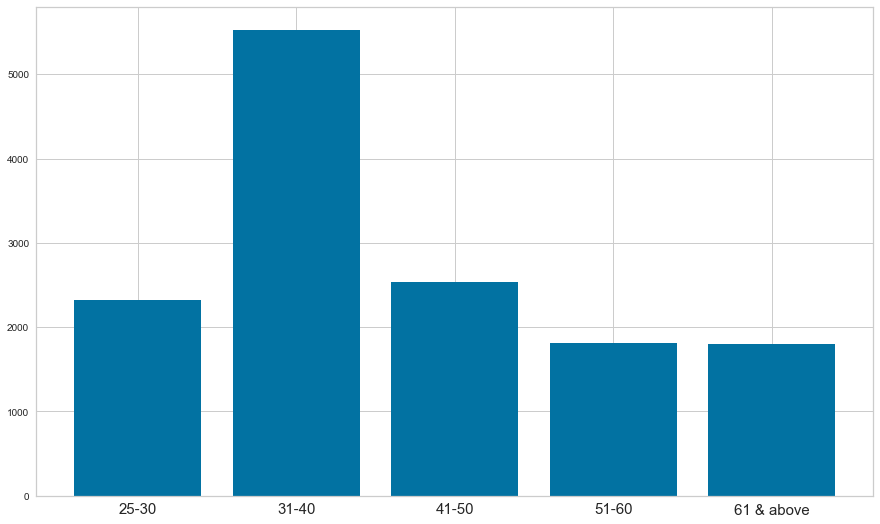

In [60]:
plt.figure(figsize=(15,9))
plt.bar(range(len(groupwise_cons)), list(groupwise_cons.values()), align='center')
plt.xticks(range(len(groupwise_cons)), list(groupwise_cons.keys()), fontsize=15)

In [63]:
groupwise_cons

{'25-30': 55549.84691677447,
 '31-40': 56451.972674629025,
 '41-50': 53403.06205533597,
 '51-60': 53439.9063876652,
 '61 & above': 97646361.0}

([<matplotlib.axis.XTick at 0xf79cd42d30>,
 <a list of 5 Text xticklabel objects>)

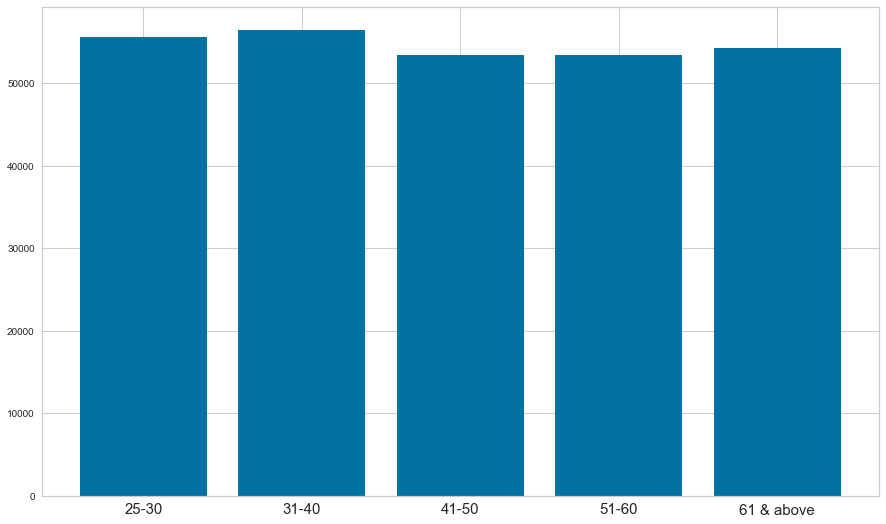

In [64]:
groupwise_cons = {}
groupwise_cons['25-30'] = data[(data['age'] >= 25) & (data['age'] < 31)]['cc_cons'].mean()
groupwise_cons['31-40'] = data[(data['age'] >= 31) & (data['age'] < 41)]['cc_cons'].mean()
groupwise_cons['41-50'] = data[(data['age'] >= 41) & (data['age'] < 51)]['cc_cons'].mean()
groupwise_cons['51-60'] = data[(data['age'] >= 51) & (data['age'] < 60)]['cc_cons'].mean()
groupwise_cons['61 & above'] = data[(data['age'] >= 61)]['cc_cons'].mean()
plt.figure(figsize=(15,9))
plt.bar(range(len(groupwise_cons)), list(groupwise_cons.values()), align='center')
plt.xticks(range(len(groupwise_cons)), list(groupwise_cons.keys()), fontsize=15)

([<matplotlib.axis.XTick at 0xf79cee2518>,
 <a list of 5 Text xticklabel objects>)

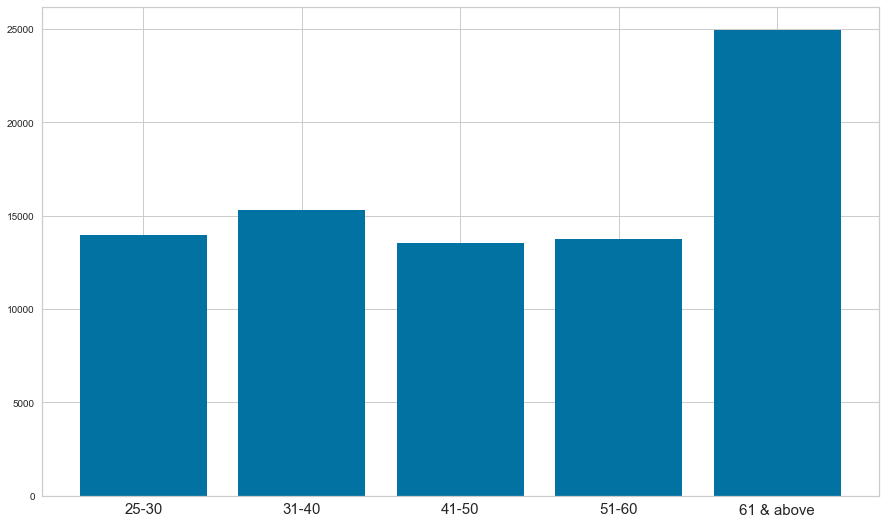

In [66]:
groupwise_cons = {}
groupwise_cons['25-30'] = data[(data['age'] >= 25) & (data['age'] < 31)]['emi_active'].mean()
groupwise_cons['31-40'] = data[(data['age'] >= 31) & (data['age'] < 41)]['emi_active'].mean()
groupwise_cons['41-50'] = data[(data['age'] >= 41) & (data['age'] < 51)]['emi_active'].mean()
groupwise_cons['51-60'] = data[(data['age'] >= 51) & (data['age'] < 60)]['emi_active'].mean()
groupwise_cons['61 & above'] = data[(data['age'] >= 61)]['emi_active'].mean()
plt.figure(figsize=(15,9))
plt.bar(range(len(groupwise_cons)), list(groupwise_cons.values()), align='center')
plt.xticks(range(len(groupwise_cons)), list(groupwise_cons.keys()), fontsize=15)

In [68]:
data['total_investment'] = data['investment_1']+data['investment_2']+data['investment_3']+data['investment_4']

([<matplotlib.axis.XTick at 0xf79e33e4e0>,
 <a list of 5 Text xticklabel objects>)

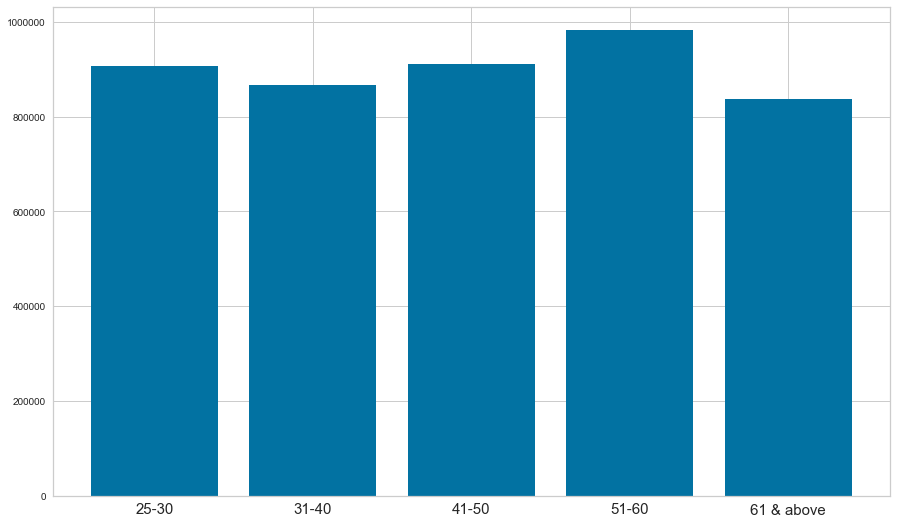

In [70]:
groupwise_cons = {}
groupwise_cons['25-30'] = data[(data['age'] >= 25) & (data['age'] < 31)]['total_investment'].mean()
groupwise_cons['31-40'] = data[(data['age'] >= 31) & (data['age'] < 41)]['total_investment'].mean()
groupwise_cons['41-50'] = data[(data['age'] >= 41) & (data['age'] < 51)]['total_investment'].mean()
groupwise_cons['51-60'] = data[(data['age'] >= 51) & (data['age'] < 60)]['total_investment'].mean()
groupwise_cons['61 & above'] = data[(data['age'] >= 61)]['total_investment'].mean()
plt.figure(figsize=(15,9))
plt.bar(range(len(groupwise_cons)), list(groupwise_cons.values()), align='center')
plt.xticks(range(len(groupwise_cons)), list(groupwise_cons.keys()), fontsize=15)

In [40]:
count_dict = get_outliers_count(numerical_data)
outliers_count_df = pd.DataFrame(count_dict.items(), columns=['Column', 'Outliers count'])
outliers_count_df

Column  Outliers count
0                     age               0
1             cc_cons_apr             462
2             dc_cons_apr             592
3             cc_cons_may             539
4             dc_cons_may             595
5             cc_cons_jun             533
6             dc_cons_jun             638
7            cc_count_apr             501
8            cc_count_may              71
9            cc_count_jun              46
10           dc_count_apr               0
11           dc_count_may               0
12           dc_count_jun               0
13               card_lim               0
14           investment_1            1763
15           investment_2             788
16           investment_3             707
17           investment_4             119
18       debit_amount_apr             565
19      credit_amount_apr             594
20        debit_count_apr               0
21       credit_count_apr               9
22  max_credit_amount_apr             697
23       debit_amount_may             573
24      credit_amount_may             448
25       credit_count_may            1985
26        debit_count_may               0
27  max_credit_amount_may             651
28       debit_amount_jun             488
29      credit_amount_jun             557
30       credit_count_jun             992
31        debit_count_jun               0
32  max_credit_amount_jun             702
33             emi_active             853
34                cc_cons            2953
35            previous_cc             317
36            previous_dc             458

### Apart from age outliers, the outliers from other columns cannot be ignored. One reason is they are very high in number, and also they are just extreme cases..so removing them is not a good option. Hence we are treating them

In [41]:
numerical_cols = ['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active']

In [187]:
X = data.drop(['cc_cons'], axis=1) 
y = numerical_data['cc_cons']

In [188]:
def treat_outliers(dataframe, col_list):
    for col in col_list:
        dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.05],inclusive=(True, True))
    return dataframe

In [189]:
X.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'previous_cc', 'previous_dc',
       'account_type_current', 'account_type_saving', 'gender_F', 'gender_M'],
      dtype='object')

In [190]:
treated_df = treat_outliers(X, numerical_cols)

In [191]:
count_dict = get_outliers_count(treated_df)
outliers_count_df = pd.DataFrame(count_dict.items(), columns=['Column', 'Outliers count'])
outliers_count_df

Column  Outliers count
0                     age               0
1             cc_cons_apr               0
2             dc_cons_apr               0
3             cc_cons_may               0
4             dc_cons_may               0
5             cc_cons_jun               0
6             dc_cons_jun               0
7            cc_count_apr               0
8            cc_count_may               0
9            cc_count_jun               0
10           dc_count_apr               0
11           dc_count_may               0
12           dc_count_jun               0
13               card_lim               0
14           investment_1            1763
15           investment_2             788
16           investment_3               0
17           investment_4               0
18       debit_amount_apr               0
19      credit_amount_apr               0
20        debit_count_apr               0
21       credit_count_apr               0
22  max_credit_amount_apr               0
23       debit_amount_may               0
24      credit_amount_may               0
25       credit_count_may            1985
26        debit_count_may               0
27  max_credit_amount_may               0
28       debit_amount_jun               0
29      credit_amount_jun               0
30       credit_count_jun             992
31        debit_count_jun               0
32  max_credit_amount_jun               0
33             emi_active             853
34            previous_cc             317
35            previous_dc             458
36   account_type_current            2207
37    account_type_saving            2207
38               gender_F            1984
39               gender_M            1984

In [192]:
treated_df.drop(['previous_cc','previous_dc'], axis=1, inplace=True)

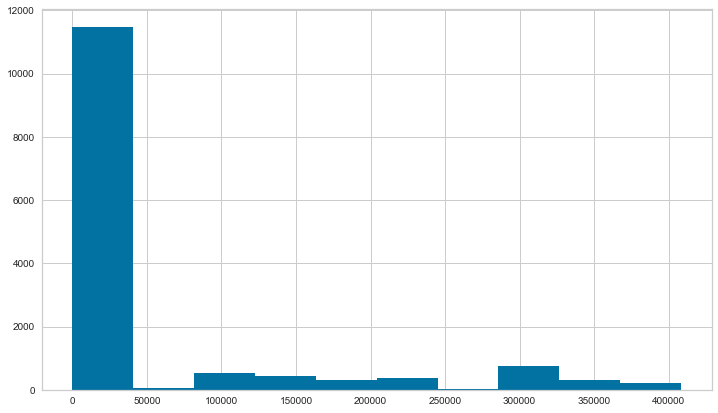

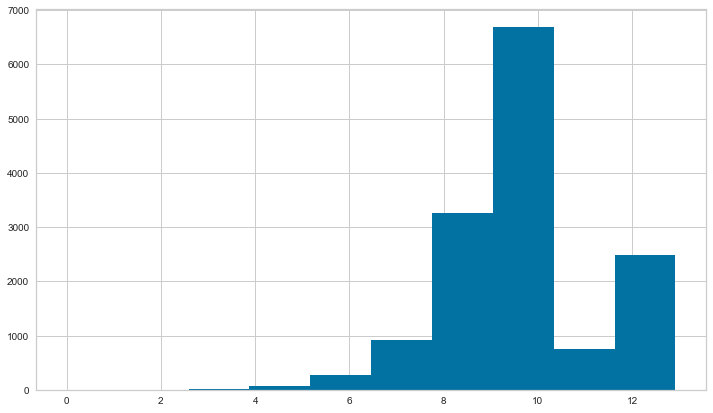

In [110]:
#performing scaling and transformation
plt.figure(figsize=(12,7))
plt.hist(y)
plt.figure(figsize=(12,7))
plt.hist(np.log1p(y))
plt.show()

In [111]:
# y = np.log1p(y)

### Taking logarithm of cc_cons removes its skewness

In [193]:
#for other variables using standard scaler
def scale(dataframe, cols_list):
    scaler = StandardScaler()
    dataframe[cols_list] = scaler.fit_transform(dataframe[cols_list])
    return dataframe,scaler

In [194]:
scaled_df,scaler_train = scale(treated_df, numerical_cols) #scaler_train is the scaler fit on train data

In [195]:
scaled_df

age  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  \
0     -0.637918     0.559150    -0.877736    -0.265819     2.882137   
1     -0.637918     0.186023    -0.797948     0.444273    -0.885198   
2      1.017886    -0.645496    -0.559397    -0.835008    -0.352863   
3     -1.134660     0.910027    -0.761310    -0.107041     0.433829   
4     -0.720709    -0.534992     0.008083    -0.670922    -0.654254   
5     -1.217450    -0.855567    -0.712251     0.396935    -0.789246   
6     -0.886289    -0.898477    -0.249317    -0.359257    -0.622213   
7     -1.217450    -0.639876    -0.662660     2.809078    -0.651685   
8      1.928578    -0.924100    -0.602561     1.009213    -0.090046   
9     -0.472338     2.043927    -0.385735    -0.824888    -0.558582   
10     0.272774     2.760669     1.113038     0.618103    -0.408953   
11    -0.389548    -0.880659    -0.445685    -0.751605     0.082784   
12     1.762998    -0.418211     0.443793     0.387239    -0.793908   
13    -0.803499     0.298996    -0.013362    -0.861132    -0.813103   
14     1.597417     0.162114    -0.191955    -0.167284    -0.490720   
15    -1.217450    -0.727235    -0.788585     0.000562     0.940281   
16    -1.134660    -0.031930    -0.541728    -0.897767    -0.433438   
17    -1.217450     0.462716     0.044919    -0.712880    -0.603169   
18     1.928578     0.472880     0.519546    -0.517166    -0.660602   
19     1.017886     0.342285     0.802976    -0.884158    -0.885198   
20     1.431837     1.631566    -0.403619    -0.665202    -0.885198   
21    -0.223967    -0.083392     1.183945    -0.668168    -0.791300   
22    -1.134660    -0.609718    -0.653433    -0.343778    -0.032499   
23     1.680207     0.172411    -0.878414    -0.522836    -0.414610   
24    -1.051869    -0.580674     0.012963    -0.257901    -0.694873   
25     1.100676     1.409802    -0.784242     0.722947    -0.512094   
26    -0.886289    -0.894760     1.052748    -0.801673     0.808909   
27     1.597417    -0.462715     1.293582     1.444610    -0.517925   
28    -0.720709     0.630145    -0.785426    -0.891940    -0.822675   
29     0.272774    -0.924100    -0.476829    -0.714708    -0.701864   
...         ...          ...          ...          ...          ...   
14968 -0.637918     2.425987    -0.413661    -0.437463     1.005022   
14969 -1.217450    -0.628469     2.834993    -0.609455    -0.607401   
14970  0.107193    -0.208309     0.203342    -0.743614    -0.385526   
14971 -0.637918    -0.364410    -0.878414    -0.344705     0.883301   
14972 -0.803499    -0.793481     0.519035    -0.021333     2.882137   
14973  1.597417     1.645606    -0.831463    -0.109504    -0.488169   
14974  0.852305    -0.614410    -0.410404    -0.294667    -0.132113   
14975 -0.306758     2.760669    -0.878414    -0.635910     2.882137   
14976 -0.720709     0.079370    -0.369773    -0.686274     2.882137   
14977  1.762998    -0.460756    -0.616049     0.698209    -0.716978   
14978 -1.134660    -0.614390    -0.806632     0.792323     2.520891   
14979  0.521144    -0.502962     0.393817    -0.758051    -0.516112   
14980 -0.223967    -0.437612    -0.854897    -0.215592    -0.442818   
14981 -0.472338     0.697879    -0.802398    -0.646783    -0.361495   
14982 -0.720709     2.760669    -0.769723    -0.429435    -0.696006   
14983 -1.217450    -0.882943    -0.878414    -0.764064    -0.885198   
14984 -0.389548    -0.579810     0.917367    -0.835538    -0.616901   
14985  1.266256    -0.747231    -0.749288    -0.111504    -0.093824   
14986  1.597417    -0.794658    -0.446974     2.809078     2.093334   
14987 -0.803499     2.760669     0.740365    -0.400647     0.052900   
14988 -0.472338    -0.382088    -0.663025     1.940226    -0.504474   
14989 -1.051869    -0.760503     0.113648    -0.690542    -0.442818   
14991 -1.051869    -0.724327    -0.863692    -0.567733    -0.769273   
14992  1.928578    -0.112448     1.209381     0.929419    -0.872048   
14993  0.521144     1.008839     0.5

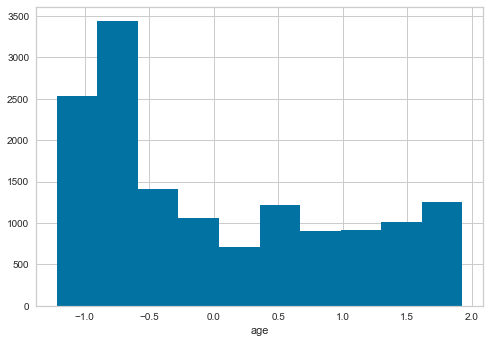

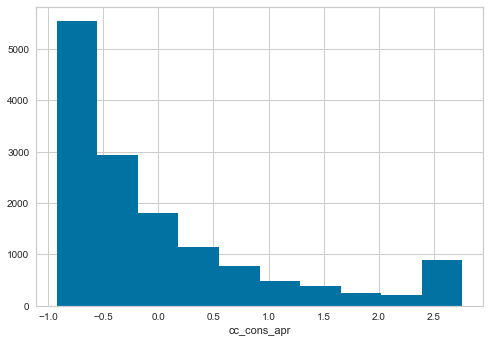

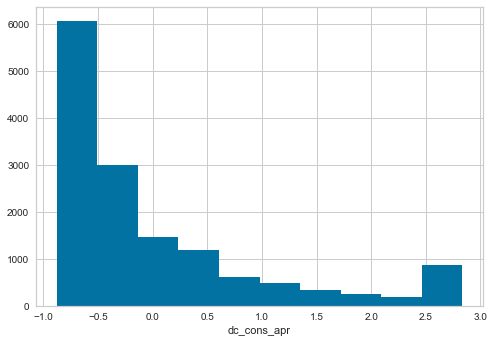

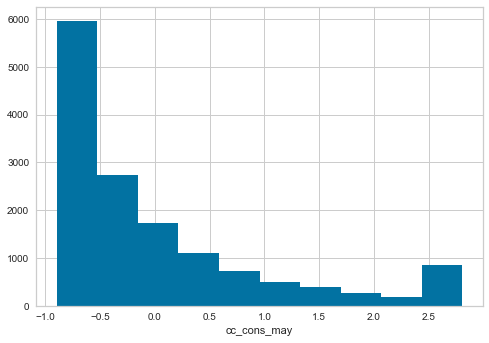

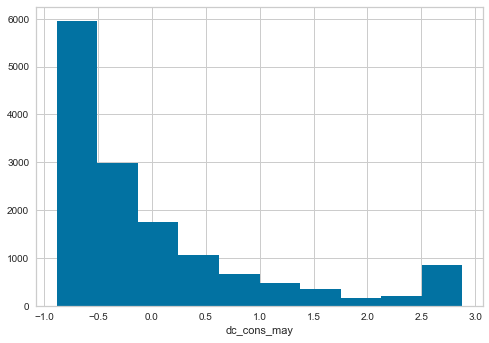

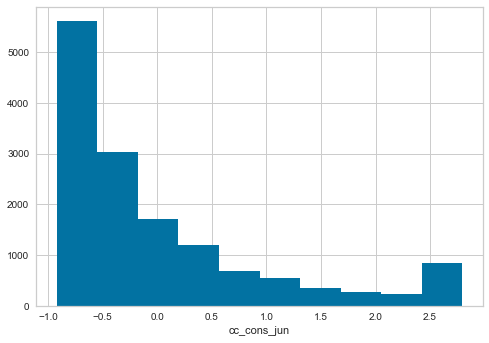

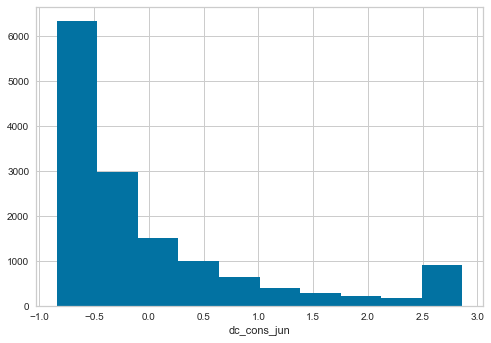

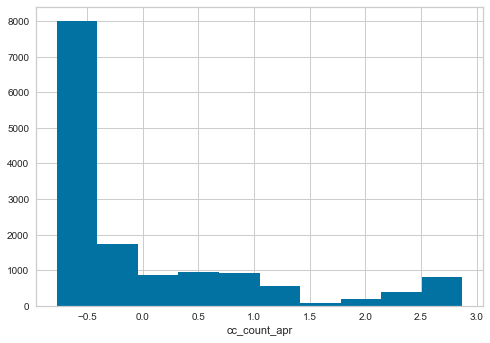

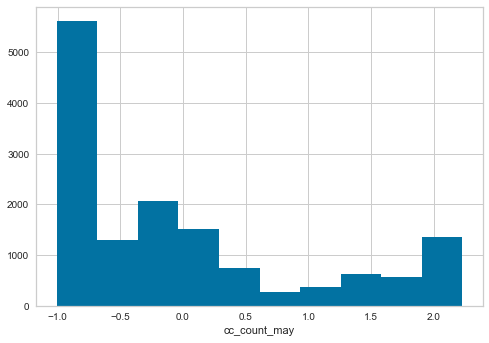

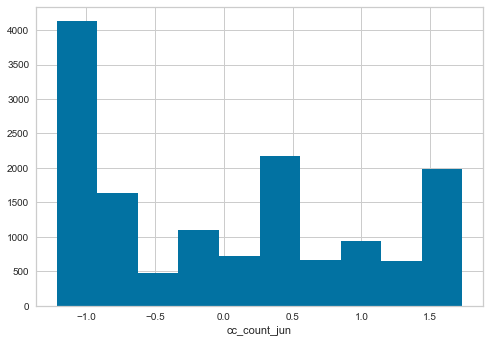

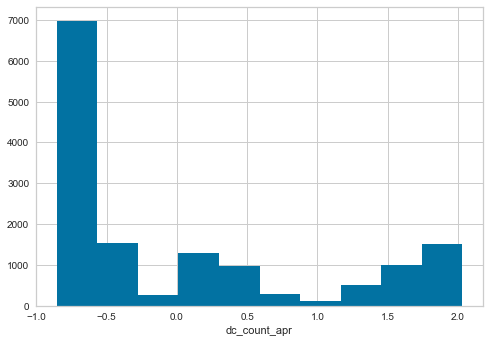

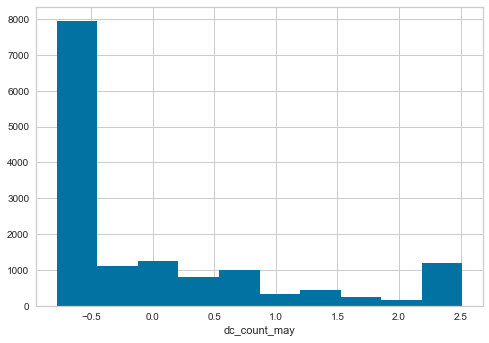

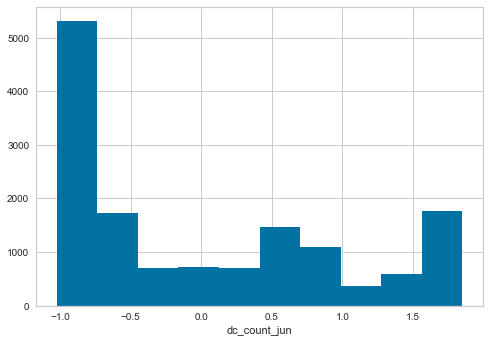

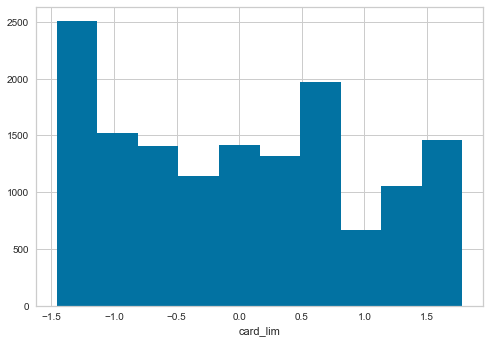

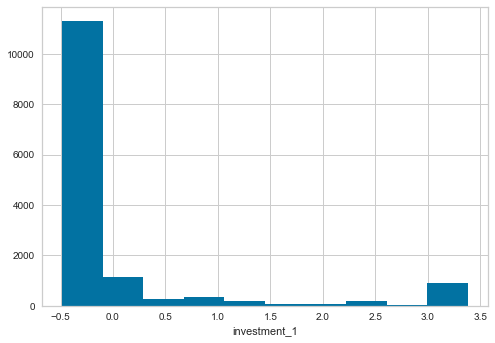

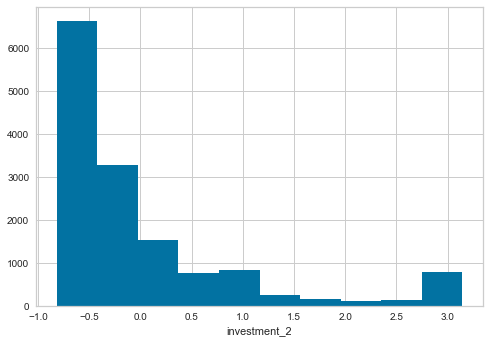

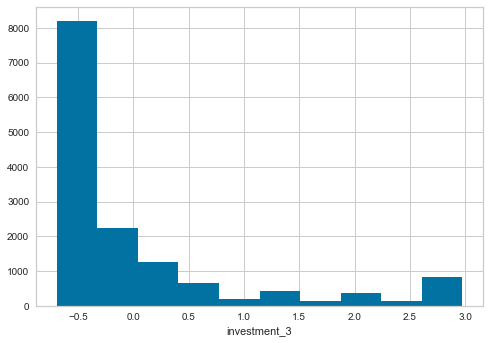

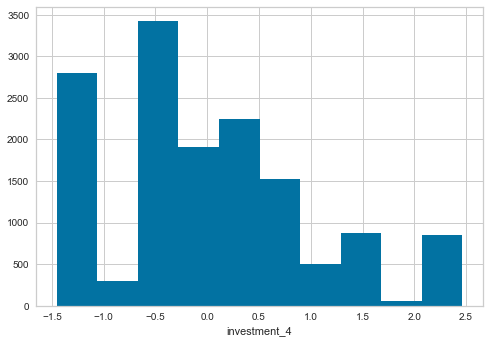

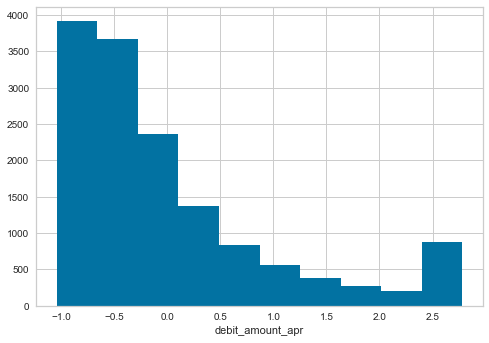

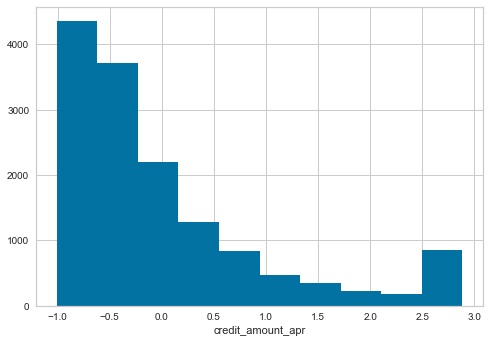

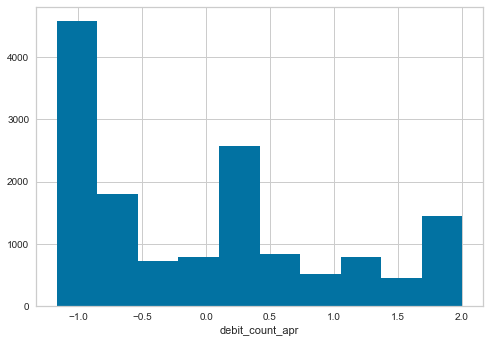

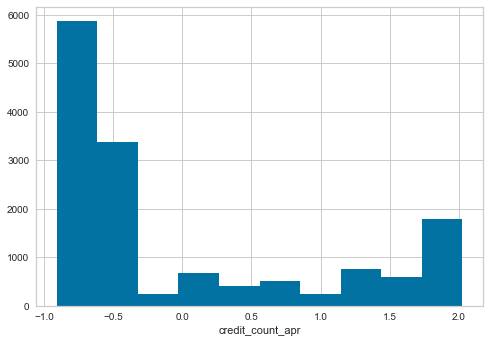

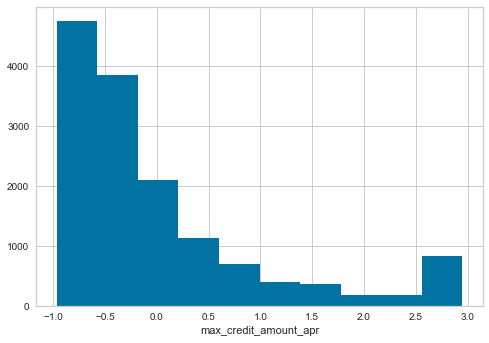

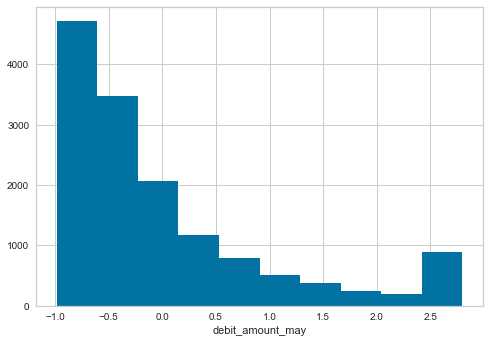

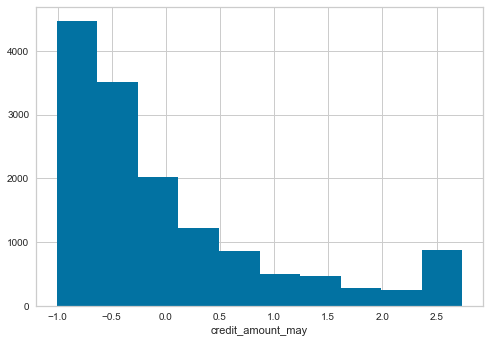

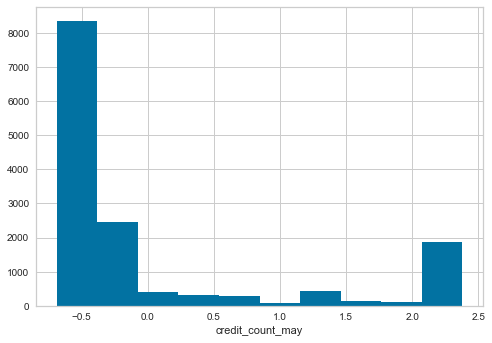

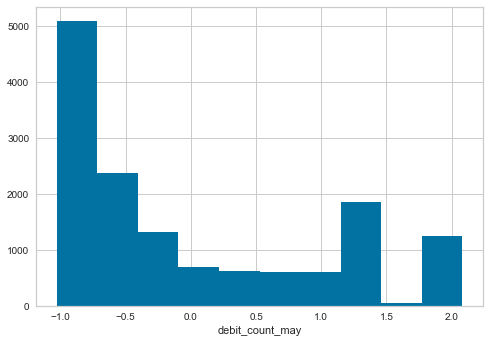

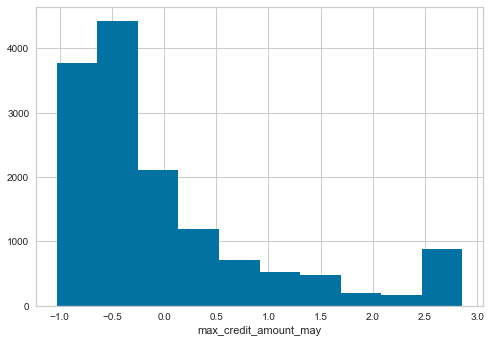

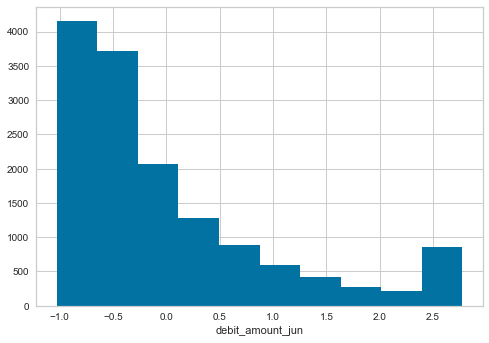

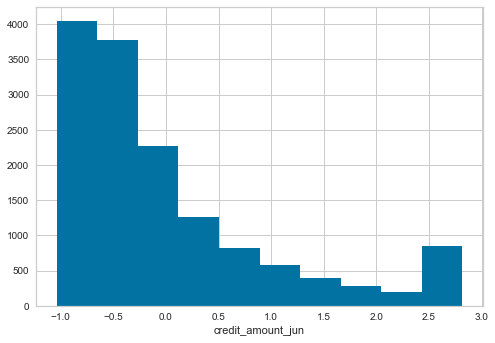

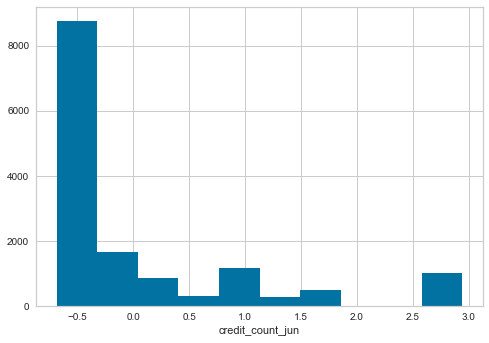

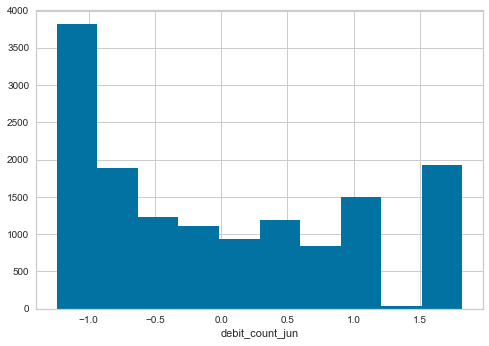

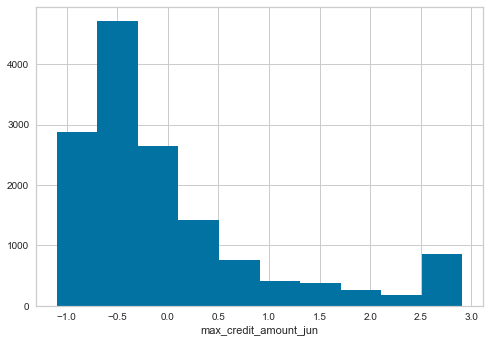

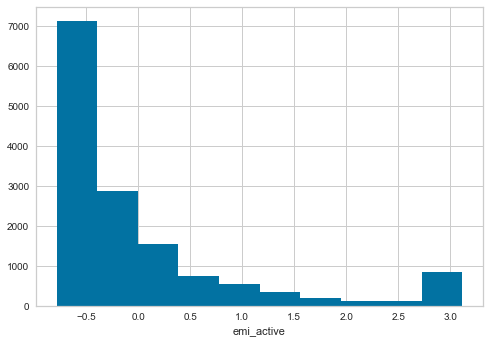

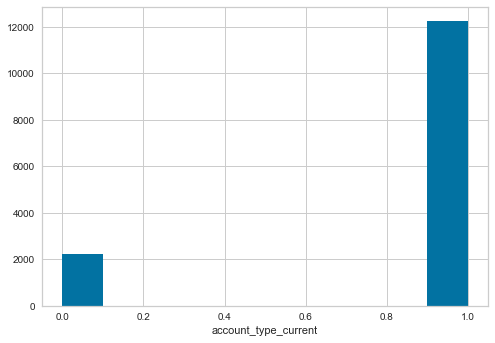

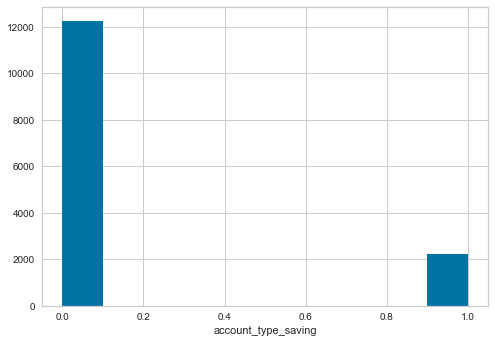

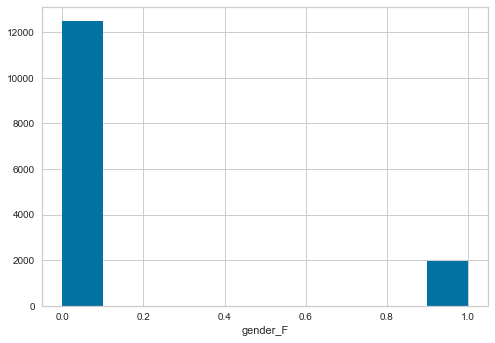

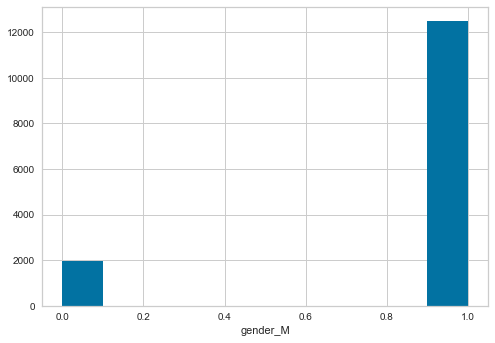

In [250]:
for col in scaled_df.columns:
    plt.figure()
    plt.hist(scaled_df[col])
    plt.xlabel(col)

In [196]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [197]:
test_data = pd.read_csv('Test.csv')

In [248]:
test_data.head()

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  17591      current      M   37          575      2795.45       1290.0   
1  13541      current      M   33          394     29405.13       1640.0   
2  13431      current      M   53          324      5985.20       6189.0   
3   8687      current      M   33          370      2105.93      18225.0   
4  14727      current      M   62          505      3269.00       3532.0   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  credit_count_may  \
0      6141.05       676.50      9146.10  ...              24.0   
1      1670.00      2463.92     10947.50  ...              43.0   
2      2696.09       766.00       716.00  ...              42.0   
3     34763.56       167.00      4260.27  ...               3.0   
4      3158.40      2699.77      3373.48  ...              70.0   

   debit_count_may  max_credit_amount_may  debit_amount_jun  \
0             20.0                 9750.0          30527.88   
1             40.0                16967.0          14342.83   
2             35.0                36398.0          32503.16   
3              5.0                97825.0          93572.42   
4             75.0                27936.0          19011.50   

   credit_amount_jun  credit_count_jun  debit_count_jun  \
0           31271.00               3.0             12.0   
1           16582.00               6.0             39.0   
2           33539.54               5.0              9.0   
3          109429.75              21.0              0.0   
4           41401.00               6.0             35.0   

   max_credit_amount_jun  loan_enq  emi_active  
0               25945.92         Y     1170.49  
1               12214.00         Y    16447.45  
2               13215.00         Y     2622.28  
3               72317.00         Y      340.79  
4               42344.00         Y     2812.20  

[5 rows x 43 columns]

In [311]:
def custom_pipeline(dataframe, scaler):
    #dropping unnecessary columns
    not_req = ['ID','region_code','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']
    dataframe = dataframe.drop(not_req, axis=1)
    
    #one hot encoding on categorical data
    dataframe = pd.get_dummies(data=dataframe, columns=['account_type', 'gender'])
    
    #list of numerical and categorical columns
    numerical_cols = ['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active']
    cat_cols = ['account_type_current','account_type_saving','gender_F','gender_M']
    
    #scaling on test data using same scaler used to fit on train data
    dataframe['investment_4'] = dataframe['investment_4'] - dataframe['investment_4'].min()
    dataframe[numerical_cols] = np.log1p(dataframe[numerical_cols])
    dataframe[numerical_cols] = scaler.transform(dataframe[numerical_cols])
    return dataframe

In [200]:
#assessing linear model on this data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X_test)
print("Training score: "+str(linear_model.score(X_train, y_train)))
print("Test score: "+str(linear_model.score(X_test, y_test)))

Training score: 0.0022224508731032433
Test score: 0.0018697812451088367


In [201]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

70688.98973607038
9819146332.274612
99091.60576090496


In [202]:
print(rmsle(y_test, y_pred))

2.0574147389310524


In [203]:
resid = y_test - y_pred

(array([3701.,   91.,  164.,  148.,  103.,  126.,   24.,  260.,   76.,
          81.]),
 array([-67725. , -24868.2,  17988.6,  60845.4, 103702.2, 146559. ,
        189415.8, 232272.6, 275129.4, 317986.2, 360843. ]),
 <a list of 10 Patch objects>)

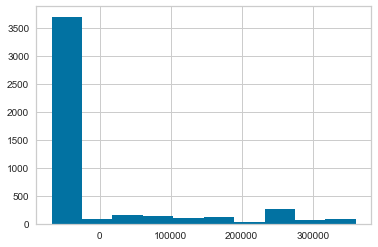

In [204]:
plt.hist(resid)

### Linear regression residuals plot is not normal. This might be due to the non-linear relationship with the outcome variable.

In [205]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Training score: "+str(dt_model.score(X_train, y_train)))
print("Test score: "+str(dt_model.score(X_test, y_test)))

Training score: 1.0
Test score: -1.0448265845058349


In [206]:
print(metrics.mean_absolute_error(y_test, y_pred_dt))
print(metrics.mean_squared_error(y_test, y_pred_dt))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

83731.48135735233
20116064096.761627
141831.111173683


In [207]:
print(rmsle(y_test, y_pred_dt))

2.305673955246695


In [208]:
resid = y_test - y_pred_dt

(array([ 126.,  252.,  182.,  339., 1638., 1481.,  272.,  156.,  225.,
         103.]),
 array([-4.073240e+05, -3.258491e+05, -2.443742e+05, -1.628993e+05,
        -8.142440e+04,  5.050000e+01,  8.152540e+04,  1.630003e+05,
         2.444752e+05,  3.259501e+05,  4.074250e+05]),
 <a list of 10 Patch objects>)

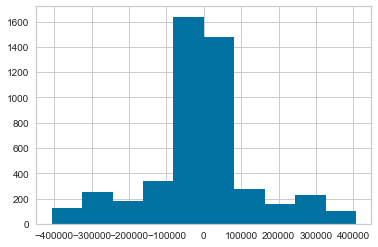

In [209]:
plt.hist(resid)

### Decision tree regressor gave a bit high rmsle but the residuals plot was normal. This might be due to decision tree regressor was able to catch non-normal relationship with the output variable.

In [210]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Training score: "+str(rf_model.score(X_train, y_train)))
print("Test score: "+str(rf_model.score(X_test, y_test)))

Training score: 0.793273464463078
Test score: -0.14710079273602927


In [211]:
print(metrics.mean_absolute_error(y_test, y_pred_rf))
print(metrics.mean_squared_error(y_test, y_pred_rf))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

76988.27896941768
11284650369.361525
106229.2350031832


In [212]:
print(rmsle(y_test, y_pred_rf))

2.1444681001506183


In [213]:
resid = y_test - y_pred_rf

(array([2.000e+00, 5.100e+01, 8.330e+02, 2.435e+03, 6.400e+02, 2.270e+02,
        1.610e+02, 1.860e+02, 1.880e+02, 5.100e+01]),
 array([-281784.3 , -213971.66, -146159.02,  -78346.38,  -10533.74,
          57278.9 ,  125091.54,  192904.18,  260716.82,  328529.46,
         396342.1 ]),
 <a list of 10 Patch objects>)

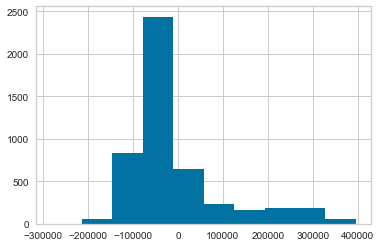

In [214]:
plt.hist(resid)

### Random forest regressor also gave similar results as decision tree regressor.

In [220]:
test_scaled = custom_pipeline(test_data, scaler_train)

In [222]:
y_pred_rf = rf_model.predict(test_scaled)

In [223]:
y_pred_rf

array([ 65310.4, 122693.2,  38255.7, ...,  60784.1, 132892.7, 122754.3])

In [224]:
to_submit = pd.DataFrame({'ID': test_data['ID'], 'cc_cons': y_pred_rf} )

In [225]:
to_submit

ID   cc_cons
0     17591   65310.4
1     13541  122693.2
2     13431   38255.7
3      8687  109691.7
4     14727   62902.8
5     14988   51026.9
6     14859   69224.9
7     16636   20069.4
8      7625    6790.3
9     16492   50878.8
10    13674   39824.6
11    11981   23088.4
12     5185  103962.6
13    15288  132786.1
14    18526  107907.7
15    16760  116545.4
16    10805   67690.8
17     8830   48890.2
18     8926   87208.4
19    10974   70343.5
20     2155    9489.7
21    17251   55172.7
22    12154   72733.2
23    12227   97324.6
24    19961   67266.1
25    13866   19145.7
26    17498  105796.2
27     7241   82401.1
28      414   88285.9
29      206   23397.0
...     ...       ...
4970   8723   89848.1
4971  16532   76437.8
4972  11859   83885.9
4973   5390   37794.1
4974    903   69086.9
4975   8766   49008.9
4976   3246   74506.6
4977  16165  111375.6
4978   5379   58549.5
4979   6303   81068.7
4980   6314   30959.1
4981  19698  121011.3
4982  15884   61593.1
4983   6279  148826.7
4984  12588    6349.0
4985   8646   98739.7
4986  16199   69501.5
4987   3089   90242.9
4988  12984   73239.9
4989   7684   51322.0
4990   3187  132365.1
4991   5898   24236.9
4992   9347  171279.4
4993  14555   20124.6
4994   9054   87909.3
4995  12512  122816.9
4996  14224   83443.5
4997  18740   60784.1
4998  18134  132892.7
4999  12413  122754.3

[5000 rows x 2 columns]

In [226]:
to_submit.to_csv('second_submission.csv', index=False)

In [227]:
to_submit

ID   cc_cons
0     17591   65310.4
1     13541  122693.2
2     13431   38255.7
3      8687  109691.7
4     14727   62902.8
5     14988   51026.9
6     14859   69224.9
7     16636   20069.4
8      7625    6790.3
9     16492   50878.8
10    13674   39824.6
11    11981   23088.4
12     5185  103962.6
13    15288  132786.1
14    18526  107907.7
15    16760  116545.4
16    10805   67690.8
17     8830   48890.2
18     8926   87208.4
19    10974   70343.5
20     2155    9489.7
21    17251   55172.7
22    12154   72733.2
23    12227   97324.6
24    19961   67266.1
25    13866   19145.7
26    17498  105796.2
27     7241   82401.1
28      414   88285.9
29      206   23397.0
...     ...       ...
4970   8723   89848.1
4971  16532   76437.8
4972  11859   83885.9
4973   5390   37794.1
4974    903   69086.9
4975   8766   49008.9
4976   3246   74506.6
4977  16165  111375.6
4978   5379   58549.5
4979   6303   81068.7
4980   6314   30959.1
4981  19698  121011.3
4982  15884   61593.1
4983   6279  148826.7
4984  12588    6349.0
4985   8646   98739.7
4986  16199   69501.5
4987   3089   90242.9
4988  12984   73239.9
4989   7684   51322.0
4990   3187  132365.1
4991   5898   24236.9
4992   9347  171279.4
4993  14555   20124.6
4994   9054   87909.3
4995  12512  122816.9
4996  14224   83443.5
4997  18740   60784.1
4998  18134  132892.7
4999  12413  122754.3

[5000 rows x 2 columns]

### All above data was modeled without transformation. The residuals plot for linear regression model was not normal and this might be a reason. The above random forest model gave an RMSLE score of 1.89 on test data

### We decided to add a constant to investment_4 so that negative values are removed and applying log transformation is possible

In [341]:
X = data.drop(['cc_cons'], axis=1) 
y = np.log1p(data['cc_cons'])

In [342]:
treated_df = treat_outliers(X, numerical_cols)

In [343]:
treated_df['investment_4'].describe()

count    14466.000000
mean      3382.788398
std       6646.328325
min      -6281.379880
25%          0.000000
50%       2351.000000
75%       6885.000000
max      19765.000000
Name: investment_4, dtype: float64

In [344]:
treated_df['investment_4'] = treated_df['investment_4']-treated_df['investment_4'].min()

In [345]:
treated_df['investment_4'].describe()

count    14466.000000
mean      9664.168278
std       6646.328325
min          0.000000
25%       6281.379880
50%       8632.379880
75%      13166.379880
max      26046.379880
Name: investment_4, dtype: float64

In [346]:
#taking log transformation to remove skewness
treated_df[numerical_cols] = np.log1p(treated_df[numerical_cols])

In [347]:
treated_df.head()

age  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  \
0  3.583519    10.122382     5.937536     9.238831    10.140061     9.698454   
1  3.583519     9.849170     6.874198     9.936584     6.021023     8.347116   
2  4.025352     8.644684     7.910224     7.583502     8.277440    10.084026   
3  3.401197    10.325170     7.120444     9.442315     9.120322     9.771213   
4  3.555348     8.914949     8.840296     8.381373     7.570443     7.660114   

   dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  ...  \
0     9.344259      1.098612      3.295837      2.397895  ...   
1     6.786717      0.693147      2.079442      2.639057  ...   
2     8.550435      3.784190      3.496508      4.499810  ...   
3     9.521590      3.988984      1.098612      3.931826  ...   
4     8.829106      4.219508      3.871201      4.418841  ...   

   credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  \
0          1.098612         4.189655              10.836380    7.423622   
1          3.091042         4.158883              10.053071    9.476110   
2          2.079442         1.098612              10.204962   10.141570   
3          3.091042         4.430817              10.669839    8.173387   
4          2.197225         3.496508              10.374896    9.455749   

    previous_cc   previous_dc  account_type_current  account_type_saving  \
0  17157.466667  13824.666667                     1                    0   
1  14610.206667    712.666667                     1                    0   
2  10533.206667   3941.703333                     1                    0   
3  20206.793333   8008.146667                     1                    0   
4   4642.133333   5224.740000                     1                    0   

   gender_F  gender_M  
0         0         1  
1         0         1  
2         0         1  
3         1         0  
4         0         1  

[5 rows x 40 columns]

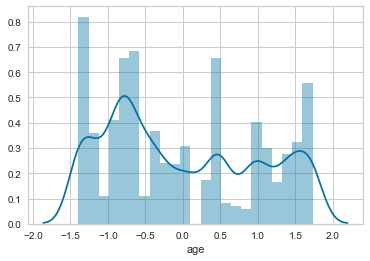

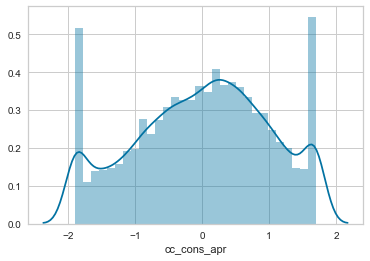

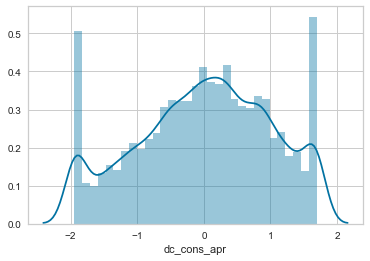

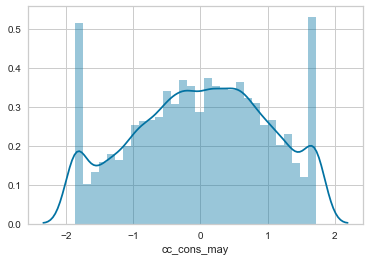

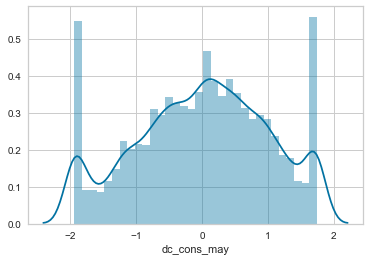

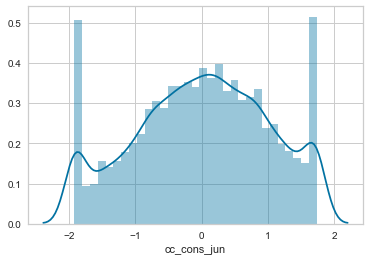

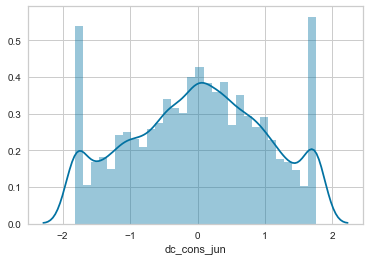

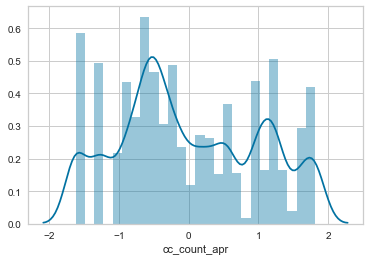

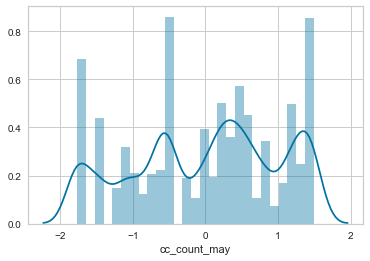

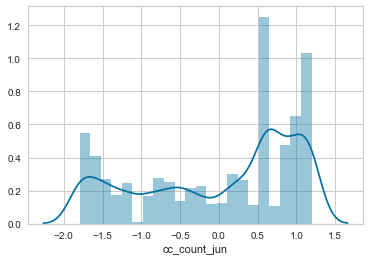

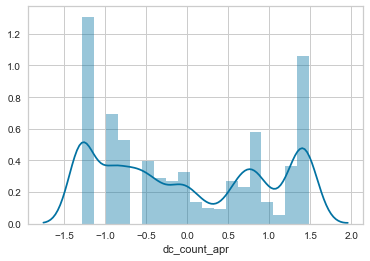

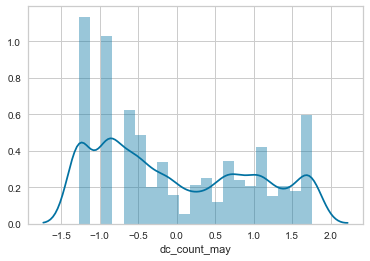

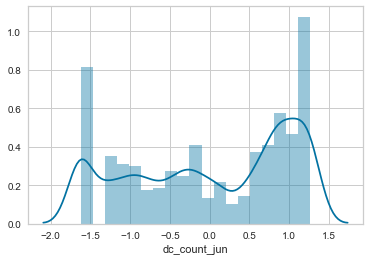

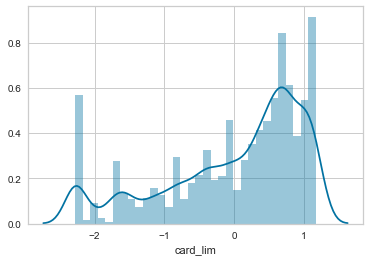

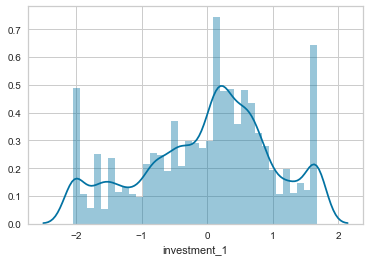

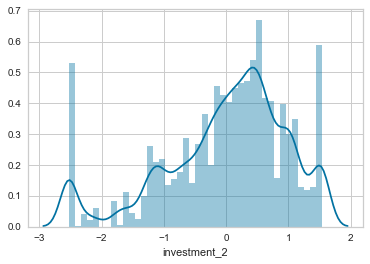

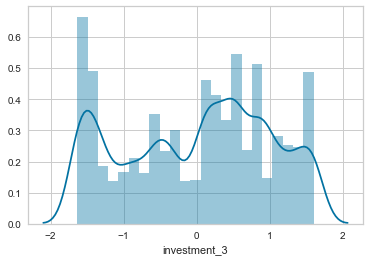

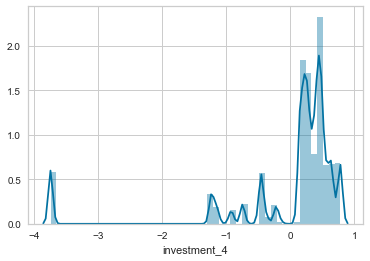

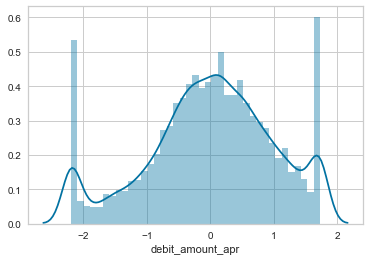

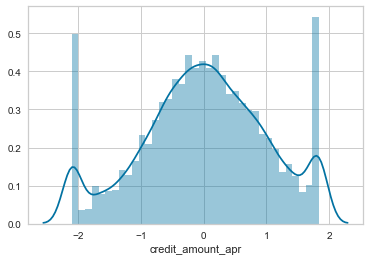

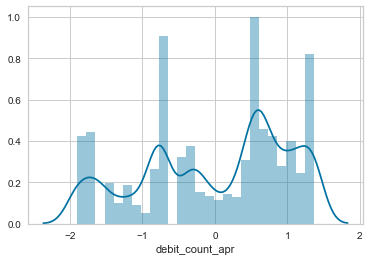

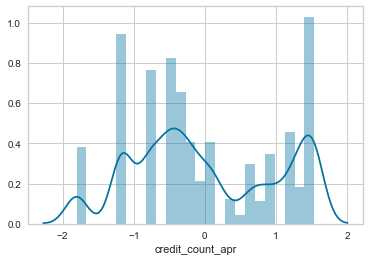

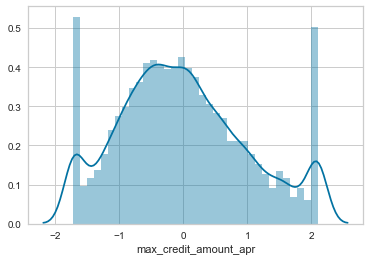

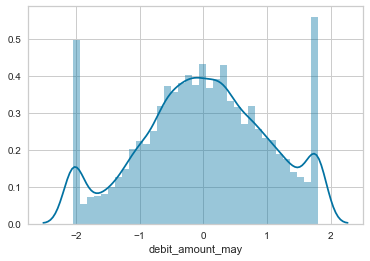

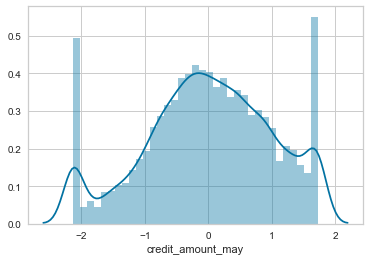

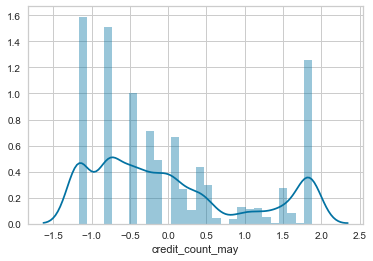

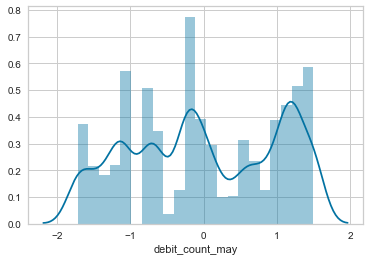

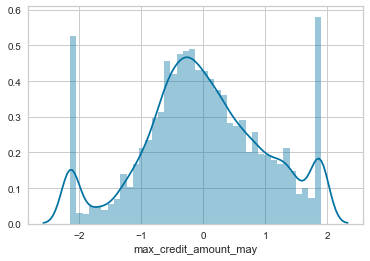

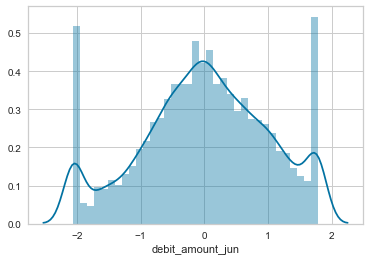

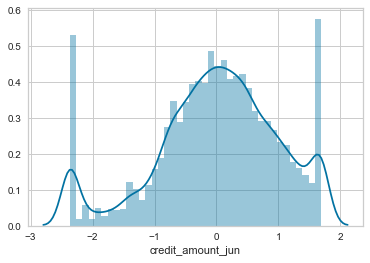

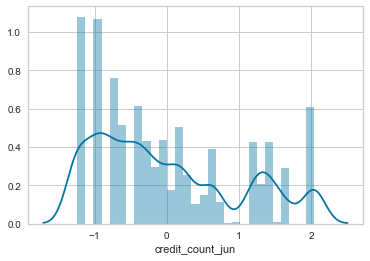

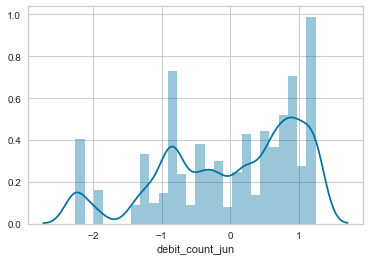

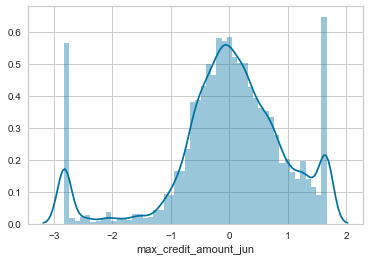

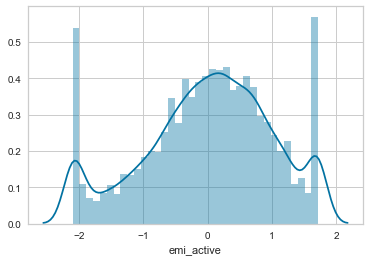

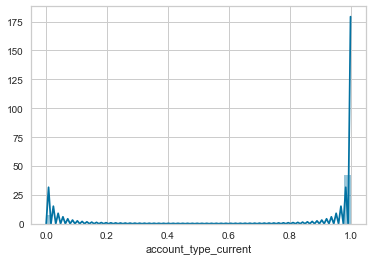

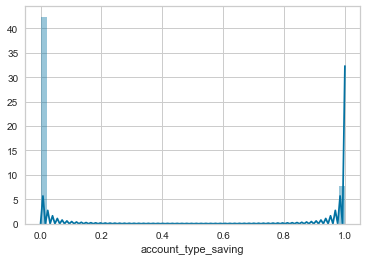

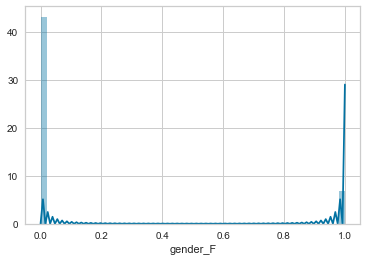

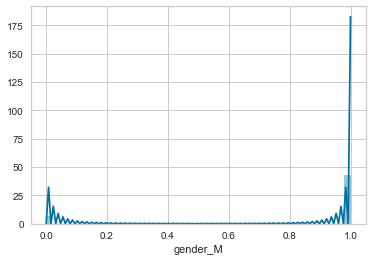

In [377]:
for col in treated_df.columns:
    plt.figure()
    sns.distplot(X[col])
    plt.xlabel(col)

In [348]:
treated_df.drop(['previous_cc','previous_dc'], axis=1, inplace=True)

In [349]:
scaled_df,scaler_train = scale(treated_df, numerical_cols)

In [350]:
scaled_df.head()

age  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  \
0 -0.586902     0.888070    -1.931765     0.201300     1.744251     0.881015   
1 -0.586902     0.634547    -1.141428     0.833577    -1.938562    -0.394453   
2  1.061366    -0.483134    -0.267251    -1.298695     0.078890     1.244939   
3 -1.267058     1.076243    -0.933651     0.385690     0.832507     0.949688   
4 -0.691994    -0.232346     0.517526    -0.575695    -0.553233    -1.042884   

   dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  ...  \
0     1.109502     -1.284291      0.312270     -0.823730  ...   
1    -1.110004     -1.621116     -0.837616     -0.592003  ...   
2     0.420599      0.946658      0.501969      1.195950  ...   
3     1.263395      1.116783     -1.764816      0.650188  ...   
4     0.662438      1.308283      0.856175      1.118149  ...   

   debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
0         -0.457267          -1.225722         -1.240968         0.769080   
1         -0.078522           0.561095          0.647749         0.738948   
2          0.287620           0.548911         -0.311195        -2.257727   
3          0.489018           0.457532          0.647749         1.005230   
4         -1.683736           0.611425         -0.199543         0.090337   

   max_credit_amount_jun  emi_active  account_type_current  \
0               0.561216   -0.543990                     1   
1              -0.225758    0.955794                     1   
2              -0.073156    1.442056                     1   
3               0.393896    0.003874                     1   
4               0.097574    0.940916                     1   

   account_type_saving  gender_F  gender_M  
0                    0         0         1  
1                    0         0         1  
2                    0         0         1  
3                    0         1         0  
4                    0         0         1  

[5 rows x 38 columns]

In [351]:
test_data = pd.read_csv('Test.csv')

In [352]:
#assessing linear model on this data
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.33, random_state=42)
linear_model = LinearRegression()
linear_model.fit(scaled_df, y)
y_pred = linear_model.predict(X_test)
print("Training score: "+str(linear_model.score(X_train, y_train)))
print("Test score: "+str(linear_model.score(X_test, y_test)))

Training score: 0.0030032926486190936
Test score: 0.0018765893320975555


In [353]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.1293667832066225
2.4908234311802664
1.5782342763925343


In [354]:
print(rmsle(y_test, y_pred))

0.154037377345487


(array([1.000e+00, 7.000e+00, 1.600e+01, 5.200e+01, 1.740e+02, 5.640e+02,
        1.846e+03, 1.156e+03, 3.220e+02, 6.360e+02]),
 array([-8.13348103, -6.97785047, -5.82221992, -4.66658936, -3.51095881,
        -2.35532826, -1.1996977 , -0.04406715,  1.11156341,  2.26719396,
         3.42282452]),
 <a list of 10 Patch objects>)

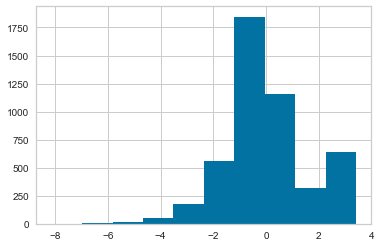

In [355]:
resid = y_test - y_pred
plt.hist(resid)

In [356]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Training score: "+str(dt_model.score(X_train, y_train)))
print("Test score: "+str(dt_model.score(X_test, y_test)))

Training score: 0.9999999999086343
Test score: -1.153059973938395


In [357]:
print(metrics.mean_absolute_error(y_test, y_pred_dt))
print(metrics.mean_squared_error(y_test, y_pred_dt))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

1.7741661878684094
5.372975099575617
2.3179678814805906


In [358]:
print(rmsle(y_test, y_pred_dt))

0.2283225855941633


(array([5.000e+00, 2.400e+01, 2.570e+02, 9.180e+02, 1.992e+03, 1.008e+03,
        4.860e+02, 7.200e+01, 1.100e+01, 1.000e+00]),
 array([-9.90871885, -7.78365371, -5.65858858, -3.53352344, -1.40845831,
         0.71660683,  2.84167196,  4.96673709,  7.09180223,  9.21686736,
        11.3419325 ]),
 <a list of 10 Patch objects>)

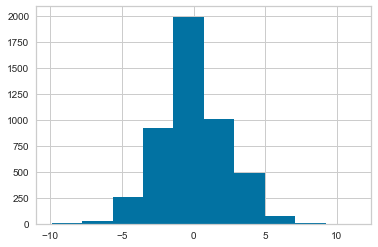

In [359]:
resid = y_test - y_pred_dt
plt.hist(resid)

In [360]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Training score: "+str(rf_model.score(X_train, y_train)))
print("Test score: "+str(rf_model.score(X_test, y_test)))

Training score: 0.795491218501972
Test score: -0.11326247125236688


In [361]:
print(metrics.mean_absolute_error(y_test, y_pred_rf))
print(metrics.mean_squared_error(y_test, y_pred_rf))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

1.2575908748018552
2.778153702049236
1.6667794401327478


In [362]:
print(rmsle(y_test, y_pred_rf))

0.16209037861182612


(array([   4.,    6.,   30.,  124.,  360., 1323., 1729.,  456.,  550.,
         192.]),
 array([-7.96105997, -6.72052317, -5.47998637, -4.23944957, -2.99891277,
        -1.75837597, -0.51783917,  0.72269763,  1.96323443,  3.20377123,
         4.44430803]),
 <a list of 10 Patch objects>)

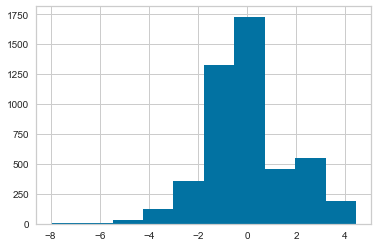

In [363]:
resid = y_test - y_pred_rf
plt.hist(resid)

In [364]:
test_scaled = custom_pipeline(test_data, scaler_train)

In [365]:
test_scaled.head()

age  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  \
0 -0.385203    -1.140645    -0.897598    -0.266204    -1.493851     0.336163   
1 -0.800133     1.042641    -0.695185    -1.445788    -0.339122     0.505836   
2  0.925696    -0.434391     0.425042    -1.011962    -1.382914    -2.067004   
3 -0.800133    -1.403360     1.336252     1.304573    -2.740619    -0.384820   
4  1.500759    -0.995480    -0.048139    -0.868599    -0.257422    -0.605046   

   dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  ...  \
0     1.372493     -0.859940     -0.536575     -1.581341  ...   
1    -1.043106     -1.045309     -0.536575     -1.581341  ...   
2     0.226743     -0.469501      0.442867     -1.406152  ...   
3     1.602849     -1.621116      1.550013      0.981537  ...   
4     0.412503     -1.284291     -0.536575      0.591935  ...   

   debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
0         -0.439615          -0.329553         -0.968261        -0.821862   
1         -1.287067          -0.963840         -0.437775         0.278711   
2         -0.369276          -0.259528         -0.583902        -1.078774   
3          0.817025           0.922901          0.647749        -3.333509   
4         -0.970934          -0.048973         -0.437775         0.175540   

   max_credit_amount_jun  emi_active  account_type_current  \
0              -0.114502   -0.805287                     1   
1              -0.871415    1.125230                     1   
2              -0.792283   -0.216222                     1   
3               0.915314   -1.705408                     1   
4               0.377587   -0.165147                     1   

   account_type_saving  gender_F  gender_M  
0                    0         0         1  
1                    0         0         1  
2                    0         0         1  
3                    0         0         1  
4                    0         0         1  

[5 rows x 38 columns]

In [366]:
y_pred_rf = rf_model.predict(test_scaled)

In [369]:
np.expm1(y_pred_rf)

array([ 8891.07502482, 16037.22986603, 25516.45523765, ...,
       15014.99732097, 13077.25068152, 57306.62954362])

In [372]:
to_submit = pd.DataFrame({'ID': test_data['ID'], 'cc_cons': np.expm1(y_pred_rf)} )

In [374]:
to_submit.to_csv('transf_applied.csv', index=False)

In [376]:
to_submit

ID       cc_cons
0     17591   8891.075025
1     13541  16037.229866
2     13431  25516.455238
3      8687   6590.676118
4     14727   7372.580488
5     14988  20128.785057
6     14859   8226.252351
7     16636  12476.949034
8      7625   9401.886476
9     16492  12818.938545
10    13674  15919.954289
11    11981  16392.233669
12     5185  40737.003448
13    15288  17651.697345
14    18526   6884.061238
15    16760  35658.675388
16    10805   9552.345601
17     8830   9643.655169
18     8926  10673.278152
19    10974  31495.963357
20     2155  13645.641419
21    17251  12439.248716
22    12154  39211.043918
23    12227  23162.263430
24    19961  14536.219777
25    13866   7050.404588
26    17498  29001.238464
27     7241  12335.649481
28      414   5846.934209
29      206   7818.185898
...     ...           ...
4970   8723  17638.556086
4971  16532  11302.128392
4972  11859  24015.009769
4973   5390   8554.100322
4974    903  11795.152076
4975   8766  21954.033236
4976   3246  27835.286552
4977  16165  10224.345202
4978   5379  31979.735282
4979   6303  20993.338665
4980   6314  25032.991305
4981  19698  21147.648324
4982  15884  12965.585803
4983   6279  33496.242756
4984  12588  15888.824103
4985   8646  23855.333224
4986  16199  31603.621799
4987   3089  21018.539329
4988  12984  50153.832092
4989   7684  10804.111012
4990   3187  21691.072048
4991   5898  12129.277660
4992   9347  19401.774024
4993  14555  31779.610082
4994   9054  24738.780288
4995  12512  11224.239427
4996  14224  11823.031689
4997  18740  15014.997321
4998  18134  13077.250682
4999  12413  57306.629544

[5000 rows x 2 columns]